# I. &nbsp; Introduction and Significance

In the last decade or two, with the growth of motor vehicles, deaths resulting from motor vehicle crash deaths has grown over the years until it was headlined as one of the leading causes of death in 2015 in the United States [U.S. Department of Transportation]. Looking at such statistics, it became clear to me that motor vehicle accidents pose a big problem, especially in the United States, and especially in highly populated parts of the United States. This explains why I chose my dataset on motor vehicle accidents New York City, one of the most populous cities in the United States (approximately 8.5 million as of 2021). In my opinion, such a high congestion in New York City makes it a good location for motor vehicle crash analysis, as it hosts a wide range of accident types. Hence, in the analyses that follow, we focus on the motor vehicle crash accidents in the five boroughs of New York City between January 2018 and March 2021.

# II. &nbsp; Research Questions

1. Vehicle safety is a growing concern, especially with increased vehicle usage in the last couple of decades. From factors such as weather conditions, vehicle type, road conditions, month of accident, etc., which ones have the greatest effect on the scale of motor vehicle crashes? How could we select a hypothesis that, from the features above, predicts the scale of motor vehicle crashes?
2. Are certain genders more prone to motor vehicle crashes than others? Does the age of the passenger affect their level of injuries? Does passenger seating affect the likelihood of crash impact severity? Are there differences in safety mechanisms across different car types/models?
3. How similar or different are the statistics of motor vehicle accident cases (e.g., the frequency of accidents, the number of people affected) in the five boroughs of New York City? If different, what are the leading causes behind these differences?

# III. &nbsp; Pre-Analysis Data Limitations

The data sets only consider data in the span of approximately 3 years (from 2018 to 2021), so the analysis of the data performed on this time range may not be representative of the number of vehicle accidents in another time range. Additionally, a police report is required to be filled out for particular crashes with injuries or deaths, and not for non-fatal crashes. Therefore, there may be questions in the police report that might not be worded in a similar fashion as the standard data collection technique for non-fatal crashes; this is commonly known as *wording bias*, and may lead to discrepancies in the data collection stage.

# IV. &nbsp; Data Description

#### General Description of Data

After joining the data, there are now four datasets I will be working with: the three original data files: one examining motor vehicle crash cases, one examining motor vehicle crash individual data, and the other examining vehicle information regarding the motor vehicle crashes, along with the merged dataset constructed in Part IV of Section IV of this report and the shape dataset of NYC. Additionally, I was able to merge the original three datasets since each one of these datasets had a column with a unique identifier of the collision for a particular instance.

#### Mechanism(s) Used to Collect Data

The data is obtained by merging collected reports filed by individuals, and this is collected in the "Finest Online Records Management System" (FORMS) database.

#### Sensitivity of Data

The datasets do not contain any sensitive information that might be exposing too much about an individual; none of the data in the datasets are inappropriate (are not offensive, insulting, or threatening) by any means.

#### Ethical Review Processes Conducted

No ethical review processes were conducted on this data.

#### Did the Individuals Used in Study Consent for their Data to be Used?

Yes, the individuals part of the study filled out a police report, filling out required information about the crash they were involved in. Hence, the individuals *did* consent for their data to be used as a part of the study conducted by the NYPD.

#### The Data which the Instances Encode

Depending on the field, there are a combination of categorical and numerical values across all the datasets. Since there are a lot of instances, we will consider a few distinct ones here: feature 'CRASH DATE' is a string with the date of accident occurrence, feature 'BOROUGH' is also a string with the name of the borough of New York City where the accident occurred, features 'LATITUDE' and 'LONGITUDE' are numerical fields containing the precise location at which the accident occurred, feauture 'PERSON_SEX' is a string either taking on the value 'M', 'F', or 'U'.

#### Timeframe of Data and Frequency of Updates

The data is updated on a daily basis as the NYPD collects data daily. The data was collected starting 2018 and continues to be updated with recent vehicle crash data. However, the date which I accessed this dataset, March 5, 2021, is the most recent day in the datasets for which data exists.

#### Sampling Strategy

The dataset is not a sample from a larger set of data; instead, it contains all the NYC motor crash data in itself between the time range of January 2018 to March 2021. However, considering the limited time range which data was collected, we could consider it as a sample of the population containing all NYC motor crash data over many more years before January 2018.

#### Rows and Columns of Data

The rows in all four datasets represent a particular crash accident, with columns (features) representing information regarding that crash, e.g., number of people involved, the age and gender of those involved, etc.

#### Missing Information from Individual Instances

When this dataset was originally collected, many instances in the dataset had missing attributes. The data cleaning and processing stage, as performed in Section IV of this report, handles this problem by replacing missing numerical attributes with the mean of the numerical attribute whenever appropriate and categorical attributes with the label 'Not Available'.

#### Location of Raw Dataset

The following link contains the datasets used throughout this project: https://cornell.box.com/s/r7ujuab5mlouv0i9i1dpvejze6m0f6zg.

#### Creation of Dataset

This dataset was collected in order to conduct detailed analysis on crash accidents compared to the traditional methods of collecting data.

#### Is the Data Self-Contained?

Yes, each of the datasets chosen is self-contained, in other words, there are no links to external resources.

#### Funding of Dataset

This data is funded by the New York Police Department (NYPD). They fund their own data collection system, called the "Finest Online Records Management System" (FORMS).

#### Potential Processes Affecting Data

The method in which crash data is collected might have a large impact on the construction of the dataset; for example, if the police report required to be filled out for crashes with injuries or deaths might be inaccurately filled out by those involved in the crash. Or, there may be those who were involved in a crash that did not file a police report, and hence, the database misses data on these individuals. The two processes described above are categorized as a bias in the sampling methodology known as *response bias*.

#### Preprocessing Applied to Original Data

The preprocessing applied, as described in Section IV of this report,  are re-listed as follows:
<ol>
    <li> Replace NaNs in Numerical Columns with Column Mean.
    <li> Replace NaNs with 'NOT AVAILABLE' strings in Categorical Columns.
    <li> Remove outliers representing crashes with extreme counts of number of people involved.
    <li> Transform the 'YEAR' and 'VEHICLE_YEAR' Columns to a DateTime Object.
    <li> Add a new dataset, named [crashData], that contains all the rows after combining the three datasets that 
         undergone the transformations in Steps (1) to (4) above.
</ol>

#### Citations

The data collected used as a part of the analysis in this report is produced by the New York City Police Department (NYPD). Each of the four datasets downloaded can be referenced at the following links:
<ol>
     <li> NYC Motor Vehicle Collisions Crashes Dataset: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95
    <li> NYC Motor Vehicle Collisions Vehicles Dataset: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Vehicles/bm4k-52h4
    <li> NYC Motor Vehicle Collisions Person Dataset: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Person/f55k-p6yu
    <li> NYC Borough Shape Dataset: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
</ol>

# V. &nbsp; Exploratory Data Analysis (EDA)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import geopandas as gps
from shapely.geometry import Point,Polygon
import contextily as ctx
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import scipy.stats as sp
from scipy.stats.mstats import spearmanr

### Import Cleaned Datasets

In [2]:
crashCases = pd.read_csv('crashCasesCleaned.csv')
crashIndividuals = pd.read_csv('crashIndividualsCleaned.csv')
crashVehicles = pd.read_csv('crashVehiclesCleaned.csv')
crashCasesCopy = pd.read_csv('crashCasesCopy.csv')
crashData = pd.read_csv('crashData.csv')

### Motor Vehicle Crash Assembled Data Summary

This section will analyze the dataset produced by combining the three datasets, stored in variable [crashData].

In [3]:
crashData.describe()
print('NYC Crash Data Aggregated Columns: \n', crashData.columns)

NYC Crash Data Aggregated Columns: 
 Index(['CRASH_DATE_x', 'CRASH_TIME_x', 'BOROUGH', 'ZIP_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED',
       'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED',
       'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED',
       'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1',
       'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3',
       'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5',
       'UNIQUE_ID_x', 'CRASH_DATE_y', 'CRASH_TIME_y', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID_x', 'PERSON_AGE',
       'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_

In [4]:
def computeMaxCorr(factors,responses):
    factor = ''
    response = ''
    maxCorr = 0
    for i in factors:
        for j in responses:
            corr = crashDataCopy[i].corr(crashDataCopy[j],method='spearman')
            if corr > maxCorr:
                maxCorr = corr
                factor = i
                response = j
    return (factor,response,maxCorr)

In [5]:
crashDataCopy = crashData.copy()
crashDataCopy['VEHICLE_YEAR'] = pd.to_numeric(crashDataCopy['VEHICLE_YEAR'])
crashDataCopy['PERSON_SEX'] = crashDataCopy['PERSON_SEX'].map({'M':0,'F':1,'U':2})
factors = ['LATITUDE','LONGITUDE','VEHICLE_OCCUPANTS','VEHICLE_YEAR','PERSON_AGE','PERSON_SEX']
responses = ['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED','NUMBER_OF_MOTORIST_INJURED',
             'NUMBER_OF_MOTORIST_KILLED','NUMBER_OF_CYCLIST_INJURED','NUMBER_OF_CYCLIST_KILLED']
factor, response, maxCorr = computeMaxCorr(factors,responses)
print('Maximum Pairwise Spearman Correlation Coefficient:', format(maxCorr,".4f"))
print('Factor and Response with Highest Correlation:', 'Factor:', factor, ';', 'Response:', response)

Maximum Pairwise Spearman Correlation Coefficient: 0.1339
Factor and Response with Highest Correlation: Factor: LONGITUDE ; Response: NUMBER_OF_MOTORIST_INJURED


### Motor Vehicle Crash Cases Data Summary

In [6]:
crashCases.describe()

,ZIP_CODE,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,COLLISION_ID
count,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,1.190430e+05
mean,10898.656583,40.669550,-73.819664,1.155497,0.005603,0.242081,0.002974,0.131709,0.000588,0.781323,0.002033,4.135982e+06
std,412.826166,1.417566,2.622874,0.375104,0.075316,0.443908,0.054451,0.343279,0.024242,0.682321,0.045965,1.705367e+05
min,10000.000000,0.000000,-201.237060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.818619e+06
25%,10879.202855,40.667599,-73.958786,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.986851e+06
50%,10879.202855,40.704830,-73.912796,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.149936e+06
75%,11222.000000,40.766824,-73.841125,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.293746e+06
max,11697.000000,40.912884,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,4.000000,2.000000,4.397133e+06


In [7]:
crashCases.columns # a list containing all columns of the [crashCases] DataFrame

Index(['CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED',
       'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED',
       'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED',
       'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1',
       'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3',
       'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5'],
      dtype='object')

    CRASH_DATE  NUMBER_PEOPLE_AFFECTED
0            1            13188.611487
1            2            11915.304391
2            3            10355.000000
3            4             8519.000000
4            5            10951.307096
5            6            11929.001353
6            7            12104.304391
7            8            12226.002705
8            9            12341.305743
9           10            12283.004058
10          11            11163.001353
11          12            11245.002705


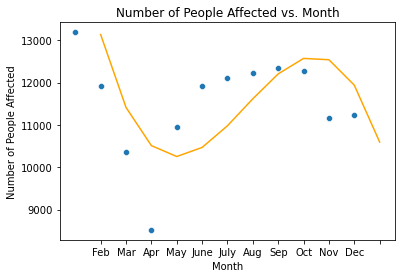

In [8]:
crashCasesCopy['CRASH_DATE'] = pd.to_datetime(crashCasesCopy['CRASH_DATE'])
crashCasesGrouped = crashCasesCopy.groupby([(crashCasesCopy['CRASH_DATE'].dt.month)])['crashCasesPeopleAffected'].sum().to_frame(name='NUMBER_PEOPLE_AFFECTED').reset_index()
print(crashCasesGrouped)
crashCasesGrouped['CRASH_DATE_2'] = crashCasesGrouped['CRASH_DATE'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
sns.scatterplot(x=crashCasesGrouped['CRASH_DATE_2'], y=crashCasesGrouped['NUMBER_PEOPLE_AFFECTED'], data=crashCasesGrouped)
plt.xlabel('Month')
plt.xticks(np.arange(1,13,1))
plt.ylabel('Number of People Affected')
plt.title('Number of People Affected vs. Month')
x = crashCasesGrouped['CRASH_DATE']
y = crashCasesGrouped['NUMBER_PEOPLE_AFFECTED']
a,b,c,d = np.polyfit(x,y,3)
plt.plot(x, a*(x**3) + b*(x**2) + c*x + d, color='orange')
plt.show()

From the *Number of People Affected vs. Month* scatterplot above, we notice that there are two local peaks in the data, and that the global optimums fall at January and April, January being the month with the greatest number of people affected by crash accidents in NYC and April being the month with the lowest number of people affected by crash accidents in NYC.

### Motor Vehicle Crash Individuals Data Summary

In [9]:
crashIndividuals.describe()

,UNIQUE_ID,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,2.266885e+06,2.266885e+06,2.266885e+06,2.266885e+06
mean,9.714374e+06,4.103165e+06,1.888170e+07,3.681337e+01
std,1.233609e+06,1.642735e+05,6.088337e+05,9.690700e+01
min,5.212477e+06,3.511951e+06,1.667989e+07,-9.990000e+02
25%,9.149998e+06,3.959784e+06,1.860500e+07,2.500000e+01
50%,9.731257e+06,4.103299e+06,1.888170e+07,3.681337e+01
75%,1.099020e+07,4.243180e+06,1.917476e+07,4.900000e+01
max,1.160027e+07,4.397135e+06,1.985926e+07,9.999000e+03


#### Age Distribution of People Involved in a Crash

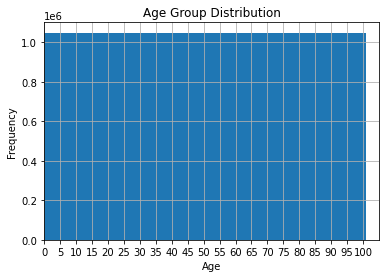

In [10]:
crashData[crashData['PERSON_AGE'] != 'NOT AVAILABLE']['PERSON_AGE'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0,105)
plt.ylim(0,1100000)
plt.xticks(np.arange(0,105,step=5))
plt.title('Age Group Distribution')
plt.show()

As seen by the histogram above, the ages of those involved in a crash are uniformly distributed (i.e., every age group has an roughly equivalent frequency).

#### Individual Crash Injury Severity vs. Average Age

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX'],
      dtype='object')
  PERSON_INJURY  AVERAGE_AGE
0       Injured    38.280022
1        Killed    47.869996
2   Unspecified    36.687355


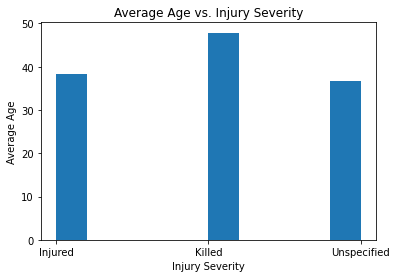

In [11]:
print(crashIndividuals.columns)
crashInjurySeverityGrouped = crashIndividuals.groupby(crashIndividuals['PERSON_INJURY'])['PERSON_AGE'].mean().to_frame(name='AVERAGE_AGE').reset_index()
print(crashInjurySeverityGrouped)
plt.hist(crashInjurySeverityGrouped['PERSON_INJURY'],weights=crashInjurySeverityGrouped['AVERAGE_AGE'])
plt.xlabel('Injury Severity')
plt.ylabel('Average Age')
plt.title('Average Age vs. Injury Severity')
plt.show()

From the results in the bar chart above, we observe that the highest average age is associated with those killed from motor vehicle accidents in NYC, with the average ages for the injured and unspecified (those who have not filed they were injured) injury severity groups roughly equal.

#### Majority Gender vs. Injury Severity Level

         PERSON_SEX PERSON_INJURY
1                 0   Unspecified
2                 1   Unspecified
3                 0   Unspecified
4                 0   Unspecified
5                 0   Unspecified
...             ...           ...
2266880           1   Unspecified
2266881           0   Unspecified
2266882           1   Unspecified
2266883           1       Injured
2266884           0   Unspecified

[1899461 rows x 2 columns]
  PERSON_INJURY  Majority Sex
0       Injured             1
1        Killed             1
2   Unspecified             1


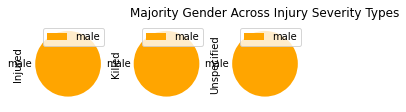

In [12]:
crashIndividualsFiltered = crashIndividuals[((crashIndividuals['PERSON_SEX'] == 'M') | (crashIndividuals['PERSON_SEX'] == 'F')) & ((crashIndividuals['PERSON_INJURY'] == 'Unspecified') | (crashIndividuals['PERSON_INJURY'] == 'Injured') | (crashIndividuals['PERSON_INJURY'] == 'Killed'))]
crashIndividualsFiltered = crashIndividualsFiltered[['PERSON_SEX','PERSON_INJURY']]
crashIndividualsFiltered['PERSON_SEX'] = crashIndividualsFiltered['PERSON_SEX'].map({'M':1,'F':0})
print(crashIndividualsFiltered)
crashIndividualsFilteredGrouped = crashIndividualsFiltered.groupby(crashIndividualsFiltered['PERSON_INJURY'])['PERSON_SEX'].agg(pd.Series.mode).to_frame(name='Majority Sex').reset_index()
print(crashIndividualsFilteredGrouped)
crashIndividualsFilteredGroupedCopy = pd.DataFrame({'male':[1,1,1],'female':[0,0,0]}, index=['Injured','Killed','Unspecified'])
crashIndividualsFilteredGroupedCopy.T.plot.pie(subplots=True, figsize=(5,5), colors=['orange','blue'])
plt.title('Majority Gender Across Injury Severity Types')
plt.show()

### Road Condition Based Accidents Across Boroughs

In [13]:
print('Crash Accidents Contributing Factors:', crashCases['CONTRIBUTING_FACTOR_VEHICLE_1'].unique())

Crash Accidents Contributing Factors: ['Unspecified' 'Pavement Slippery' 'Following Too Closely'
 'Pavement Defective' 'Failure to Yield Right-of-Way'
 'Driver Inattention/Distraction' 'Passing or Lane Usage Improper'
 'NOT AVAILABLE' 'Turning Improperly' 'Reaction to Uninvolved Vehicle'
 'Unsafe Speed' 'Lost Consciousness' 'Unsafe Lane Changing' 'Illnes'
 'Fell Asleep' 'Driver Inexperience' 'Traffic Control Disregarded'
 'Oversized Vehicle' 'View Obstructed/Limited'
 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion'
 'Obstruction/Debris' 'Backing Unsafely' 'Aggressive Driving/Road Rage'
 'Other Vehicular' 'Drugs (illegal)' 'Outside Car Distraction'
 'Brakes Defective' 'Alcohol Involvement' 'Passing Too Closely'
 'Steering Failure' 'Traffic Control Device Improper/Non-Working'
 'Passenger Distraction' 'Glare' 'Cell Phone (hand-Held)'
 'Physical Disability' 'Fatigued/Drowsy' 'Failure to Keep Right'
 'Driverless/Runaway Vehicle' 'Accelerator Defective'
 'Prescription Medication' 'O

As we can see from the list of contributing factors above, the road-related conditions are represented by the following field values: 'Pavement Slippery', 'Pavement Defective', and 'Lane Marking Improper/Inadequate'.

In [14]:
roadFactors = crashCases[(crashCases['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Pavement Slippery') |
                         (crashCases['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Pavement Defective') |
                         (crashCases['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Lane Marking Improper/Inadequate') |
                         (crashCases['CONTRIBUTING_FACTOR_VEHICLE_2'] == 'Pavement Slippery') |
                         (crashCases['CONTRIBUTING_FACTOR_VEHICLE_2'] == 'Pavement Defective') |
                         (crashCases['CONTRIBUTING_FACTOR_VEHICLE_2'] == 'Lane Marking Improper/Inadequate')
                        ]
roadFactorsbyBorough = roadFactors.groupby('BOROUGH').size().reset_index()
print(roadFactorsbyBorough)

         BOROUGH    0
0          BRONX  137
1       BROOKLYN  245
2      MANHATTAN  124
3  NOT AVAILABLE  909
4         QUEENS  230
5  STATEN ISLAND   67


From the results in the table above, we can conclude that the Brooklyn and Queens boroughs have the most crash accidents caused by road conditions. We plot the proportions of motor accidents caused by such improper road conditions per borough in the pie chart below:

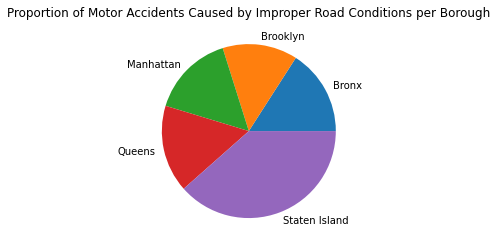

In [15]:
tot = crashCases.groupby('BOROUGH').size().reset_index()
maxVal = max(roadFactorsbyBorough.loc[0,0]/tot.loc[0,0], roadFactorsbyBorough.loc[1,0]/tot.loc[1,0], roadFactorsbyBorough.loc[2,0]/tot.loc[2,0], roadFactorsbyBorough.loc[4,0]/tot.loc[4,0], roadFactorsbyBorough.loc[5,0]/tot.loc[5,0])
props = [(roadFactorsbyBorough.loc[0,0]/tot.loc[0,0])/maxVal * 100, 
         (roadFactorsbyBorough.loc[1,0]/tot.loc[1,0])/maxVal * 100, 
         (roadFactorsbyBorough.loc[2,0]/tot.loc[2,0])/maxVal * 100, 
         (roadFactorsbyBorough.loc[4,0]/tot.loc[4,0])/maxVal * 100, 
         (roadFactorsbyBorough.loc[5,0]/tot.loc[5,0])/maxVal * 100
        ]
plt.pie(props, labels=['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])
plt.title('Proportion of Motor Accidents Caused by Improper Road Conditions per Borough')
plt.show()

The pie chart generated above indicates that Staten Island had the highest *percentage* of motor vehicle accidents due to improper road conditions out of all five boroughs, despite Staten Island being the borough with the least *number* of accidents caused by improper road conditions, as seen in the table above.

### Motor Vehicle Crash Vehicle Data Summary

In [16]:
crashVehicles.describe()

,UNIQUE_ID,COLLISION_ID,VEHICLE_YEAR,VEHICLE_OCCUPANTS
count,1.155658e+06,1.155658e+06,1.155658e+06,1.155658e+06
mean,1.891043e+07,4.110686e+06,2.014126e+03,1.180679e+01
std,6.251137e+05,1.667490e+05,1.054343e+02,9.349085e+03
min,1.667989e+07,3.511951e+06,1.920000e+03,0.000000e+00
25%,1.860685e+07,3.965017e+06,2.010000e+03,1.000000e+00
50%,1.890438e+07,4.112544e+06,2.014000e+03,1.000000e+00
75%,1.954874e+07,4.255399e+06,2.016000e+03,2.000000e+00
max,1.985926e+07,4.397135e+06,9.999000e+03,9.999999e+06


#### Injury Severity per Most Common Motor Vehicle Types

Text(0, 0.5, 'Composition based on Motor Vehicle Types')

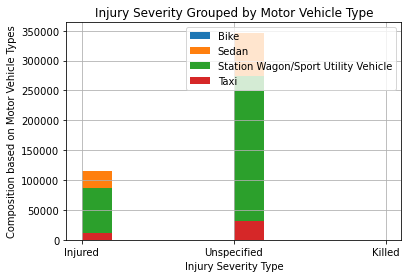

In [17]:
counts = crashData['VEHICLE_TYPE'].value_counts(normalize=True)
crashDataCopy = crashDataCopy.loc[(crashDataCopy['VEHICLE_TYPE'] != 'NOT AVAILABLE') &
                                  (crashDataCopy['VEHICLE_TYPE'].isin(counts[counts > 0.04].index)), :]
crashDataCopy.groupby('VEHICLE_TYPE')['PERSON_INJURY'].hist(legend=True)
plt.title('Injury Severity Grouped by Motor Vehicle Type')
plt.xlabel('Injury Severity Type')
plt.ylabel('Composition based on Motor Vehicle Types')

From the bar chart above, it is evident that between January 2018 and March 2021, passengers in station wagon/sport utility vehicles comprised the majority of total injuries in that period of time. At the same time, passengers in station wagon/sport utility vehicles comprised the majority of accidents that did not involve any injuries or deaths between that time period.

#### Number of People Involved in Crash vs. Motor Vehicle Year

<AxesSubplot:title={'center':'crashDataPeopleAffected'}, xlabel='VEHICLE_YEAR_GROUPED'>

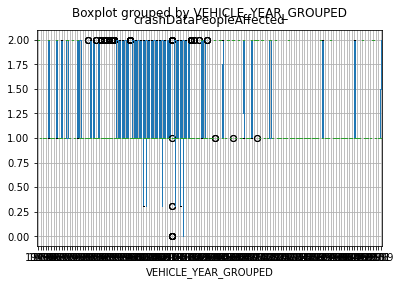

In [18]:
crashDataCopy.loc[:,'crashDataPeopleAffected'] = crashData.loc[:,'NUMBER_OF_PERSONS_INJURED'] + crashData.loc[:,'NUMBER_OF_PERSONS_KILLED']
grouped = crashDataCopy.groupby('VEHICLE_YEAR')['crashDataPeopleAffected'].sum().reset_index()
crashDataCopy.loc[:,'VEHICLE_YEAR_GROUPED'] = crashDataCopy.loc[:,'VEHICLE_YEAR']
crashDataCopy.boxplot('crashDataPeopleAffected', by='VEHICLE_YEAR_GROUPED', manage_ticks=True)

#### Point of Impact on Vehicle vs. Travel Direction

Text(0.5, 1.0, 'Travel Direction Grouped by Point of Impact')

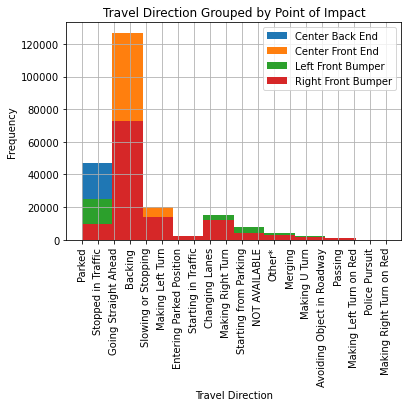

In [19]:
crashVehiclesCopy = crashVehicles.copy()
counts = crashVehicles['POINT_OF_IMPACT'].value_counts(normalize=True)
crashVehiclesCopy = crashVehiclesCopy.loc[(crashVehiclesCopy['POINT_OF_IMPACT'].isin(counts[counts > 0.1].index)), :]
crashVehiclesCopy.groupby('POINT_OF_IMPACT')['PRE_CRASH'].hist(legend=True,xrot=90)
plt.xlabel('Travel Direction')
plt.ylabel('Frequency')
plt.title('Travel Direction Grouped by Point of Impact')

From the histogram above, we can see that most data was collected on vehicles that were traveling straight ahead or backing up. Of those, more of them had their right front bumpers damaged compared to the rest who had their center front end damaged. We should also note that the histogram bins colored with a combination of red and green represented vehicles with particular travel directions that damaged only their bumper and not their center ends, as opposed to the remaining bins, which represent vehicles traveling in a particular direction resulting in some combination of bumper damage and center end damage.

### NYC Crash Location Map

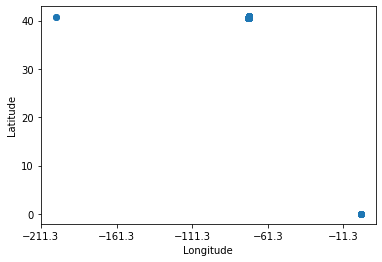

In [20]:
lat = crashCases['LATITUDE']
long = crashCases['LONGITUDE']
plt.scatter(x=long, y=lat)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xticks(np.arange(xmin, xmax+1, 50.0))
plt.show()

### Zooming into Location-Based Clusters

By zooming into the location of the center cluster (second cluster from the left), we gain additional insights into the number of data points behind that cluster that we cannot necessarily see otherwise.

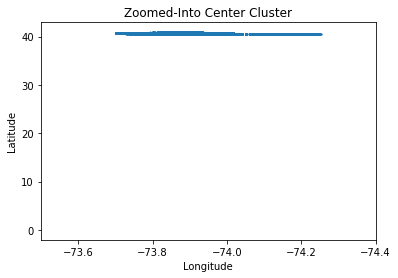

In [21]:
lat = crashCases['LATITUDE']
long = crashCases['LONGITUDE']
plt.scatter(x=long, y=lat, s=1)
plt.xlim(-73.5,-74.4)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zoomed-Into Center Cluster')
plt.show()

### Applying the $k$-Means Clustering Algorithm

Updated Locations: 
         LONGITUDE   LATITUDE
0      -73.819275  40.667599
1      -73.819275  40.667599
2      -73.819275  40.667599
3      -73.819275  40.667599
4      -73.753650  40.689194
...           ...        ...
119038 -73.983820  40.740788
119039 -73.930200  40.838203
119040 -73.961020  40.774956
119041 -73.991776  40.709198
119042 -73.991790  40.764683

[119043 rows x 2 columns]
Centroid Locations: 
               0          1
0 -7.384340e+01  40.758366
1  4.263256e-14   0.000000
2 -2.012371e+02  40.758370
3 -7.396651e+01  40.681694


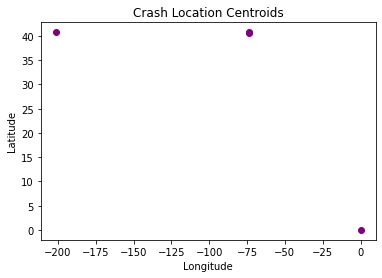

In [22]:
X = crashCases[['LONGITUDE','LATITUDE']]
X = X.dropna()
print('Updated Locations: \n', X)
km = KMeans(n_clusters=4)
km.fit(X)
centroids = pd.DataFrame(km.cluster_centers_)
print('Centroid Locations: \n', centroids)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crash Location Centroids')
plt.scatter(x=centroids.iloc[:,0],y=centroids.iloc[:,1], color='purple')

From the simulation of the $k$-means clustering algorithm above, we can observe that there are three clusters (centroids), one at an approximate location of longitude = -200 and latitude = 40, one at an approximate location of longitude = -75 and latitude = 40, and the other at an approximate location of longitude 0 and latitude 0. We can also observe that the centroids look very similar to the points of the crash location map above, which is largely because a lot of data points represented crashes that were from a very close distance from each other, and thus, had very similar longitude and latitude values.

/Users/rayanwali/opt/anaconda3/lib/python3.8/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


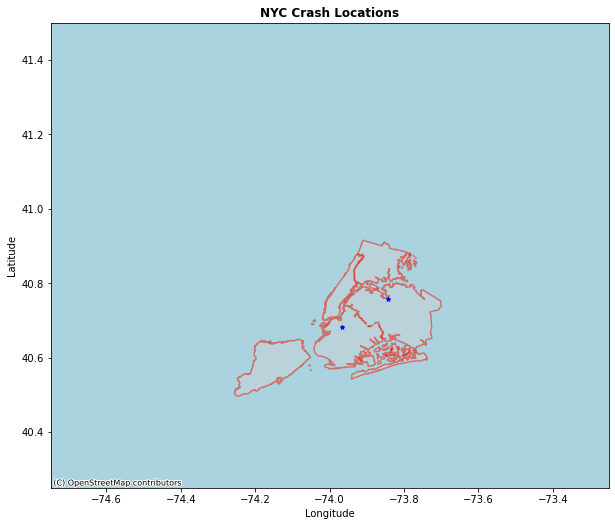

In [23]:
longCentroids = centroids.iloc[:,0].tolist()
latCentroids = centroids.iloc[:,1].tolist()
geometry = [Point(xy) for xy in zip(longCentroids,latCentroids)]
geo_df = gps.GeoDataFrame(geometry=geometry)
fig, ax = plt.subplots(figsize=(10,10))
nyc = gps.read_file('nyc-boundaries/geo_export_1ff5f196-6d8c-4ec7-8c65-2faebe80f314.shp')

ax = nyc.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)
ax = gps.GeoSeries(nyc['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)
ax = geo_df.plot(ax=ax, markersize=20, color='blue', marker='*', label='NYC', zorder=3)
ax.set_aspect('equal')
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('NYC Crash Locations',fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.75,-73.25)
plt.ylim(40.25,41.5)
plt.show()

# VI. &nbsp; Preregistration of Data Analysis

### Description of Analysis #1

The following analysis will answer Research Question #3 from Section II, which is restated as follows:

    "How similar or different are the statistics of motor vehicle accident cases (e.g., the frequency of accidents, the number of people affected) in the five boroughs of New York City? If different, what are the leading causes behind these differences?"

Since we want to compare the distributions among different groups (represented by the five boroughs of New York City), we will apply a Chi-Square Test of Homogeneity to compare the population distributions across the metrics we will examine. The Chi-Square Test of Homogeneity is a form of a hypothesis test that will provide us, for each of the metrics listed above, whether there exist any differences in distribution across the five boroughs.

Additionally, we test the assumptions that the Chi-Square Test of Homogeneity makes on our data, which are listed as follows:
* The data in cells are frequencies or counts (not percentages).
* The categories of the variables are mutually exclusive, i.e., there are no subjects that are placed in more than one category.

In our case, the categories are represented by the five boroughs of New York City. The first assumption is met, as the data in each cell represents the count of individuals involved in motor vehicle crashes in a particular borough of New York City. Assuming that the same individual does not experience a motor vehicle accident in two different boroughs of New York City, the second assumption is met.

We will use the following Chi-Square Test Statistic formula in our analysis:

$$\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}.$$

The result of the Chi-Square Test will directly indicate whether there are differences in statistics between the five boroughs of New York City. If it returns that there is a significant difference between the groups, then we can know how to conduct our analysis for the next step (as discussed in Analysis #2) &mdash; in predicting the severity, we can split the data set into the five boroughs and conduct analysis on each one of them separately. On the other hand, if there is no significant difference, we will use the data set altogether for all New York City boroughs.

#### Citations

1. McHugh, Mary L. “The chi-square test of independence.” Biochemia medica vol. 23,2 (2013): 143-9. doi:10.11613/bm.2013.018

### Description of Analysis #2

#### Part I: Causal Analysis

The following analysis will answer Research Question #1 from Section II, which is restated as follows:

    "Vehicle safety is a growing concern, especially with increased vehicle usage in the last couple of decades. From factors such as weather conditions, vehicle type, road conditions, month of accident, etc., which ones have the greatest effect on the scale of motor vehicle crashes? How could we select a hypothesis that, from the features above, predicts the scale of motor vehicle crashes?"

In order to decide which factors have the greatest effect on the scale of motor vehicle crashes, we will individually fit each factor with the response variable, which in this case, is the scale of the motor vehicle crashes. Each factor might yield a different type of relationship with the response variable from the other factors; for instance, one factor might have a strong linear relationship with the response variable whereas another factor might have some kind of polynomial association with the response variable.

In this situation, for each predictor-response variable pair, we need to test all major associations (linear, polynomial, exponential fits), and select the one with the maximum association. For a linear relationship, we will measure this association with the squared correlation coefficient ($R^2$) value, and other forms of relationships, we will use the mean-squared error (MSE) metric as an indicator.

#### Part II: Predictive Analysis

Now, to answer the second part of the research question, we will find a hypothesis that fits all the observed features well, i.e., most accurately predicts the scale of motor vehicle crashes. To do this, we will perform $k$-fold cross validation, since it yields an unbiased estimate of the generalization/prediction error. The following note describes a brief overview of how we will conduct this form of cross-validation:




We will iterate through a set of proposed hypotheses. These hypotheses, classified by general structure of the data, are listed as follows:

* for simple linear relationships: Perceptron, SVMs;
* for simple non-linear relationships: Decision Trees, SVMs with non-linear kernels;
* for more complex relationships: Deep Neural Networks/Random Forests.

Each hypothesis will train on the "sub-training-data", and we will select the one that achieves the least error (greatest accuracy) on the validation set (after the split of the original data set we have by $k$-fold cross validation) given to us.

# VII. &nbsp; Data Analysis

### Part I: Conducting a Chi-Square Test of Homogeneity

As described in Section VII (Preregistration of Data Analysis), a Chi-Square Test of Homogeneity would allow us to compare the distributions across different groups. In our case, the research question we want to answer is of checking for any significant differences among each pair from the five boroughs of New York City.

We state the null and alternate hypothesis as follows, represented by $H_0$ and $H_1$ respectively:

$$H_0: \text{The crash statistics across the five boroughs are identical}$$
$$H_1: \text{The crash statistics across the five boroughs are not identical}$$

In [24]:
def get_marginals(df,row,col):
    return (df.loc[row,:].sum(), df.loc[:,col].sum())

In [25]:
# Mapping Boroughs to Numerical Values
print(crashData['BOROUGH'].unique())
crashData['BOROUGH_MAPPED'] = crashData['BOROUGH'].map({'NOT AVAILABLE':-1,'BROOKLYN':0,'QUEENS':1,'MANHATTAN':2,'BRONX':3,'STATEN ISLAND':4})

crashDataNumeric = crashData.select_dtypes(include=np.number)
crashDataNumeric = crashDataNumeric.drop(['LATITUDE', 'LONGITUDE', 'ZIP_CODE', 'VEHICLE_YEAR', 'PERSON_AGE', 'COLLISION_ID', 'VEHICLE_ID_x', 'UNIQUE_ID_x', 'UNIQUE_ID_y'], axis=1)
print('Transformed Data Columns: \n', crashDataNumeric.columns)

brooklyn = crashDataNumeric[crashDataNumeric['BOROUGH_MAPPED'] == 0].mean(axis=0)
queens = crashDataNumeric[crashDataNumeric['BOROUGH_MAPPED'] == 1].mean(axis=0)
manhattan = crashDataNumeric[crashDataNumeric['BOROUGH_MAPPED'] == 2].mean(axis=0)
bronx = crashDataNumeric[crashDataNumeric['BOROUGH_MAPPED'] == 3].mean(axis=0)
staten_island = crashDataNumeric[crashDataNumeric['BOROUGH_MAPPED'] == 4].mean(axis=0)

data = pd.DataFrame([[brooklyn[1],brooklyn[2],brooklyn[3],brooklyn[4]],
                     [queens[1],queens[2],queens[3],queens[4]],
                     [manhattan[1],manhattan[2],manhattan[3],manhattan[4]],
                     [bronx[1],bronx[2],bronx[3],bronx[4]],
                     [staten_island[1],staten_island[2],staten_island[3],staten_island[4]]])
print('Table (statistics across the five boroughs): \n', data.head())

totSum = data.values.sum()
mgnVls = data.copy()
for row in range(data.shape[0]):
    for col in range(data.shape[1]):
        mgnVls[row,col] = (get_marginals(data,row,col)[0] * get_marginals(data,row,col)[1])/totSum

dataNew = data.subtract(mgnVls,fill_value=0)
chi_squared = np.sum((dataNew.values**2)/mgnVls.values)
print('Chi-Squared Test Statistic:', round(chi_squared,2))

['NOT AVAILABLE' 'BROOKLYN' 'QUEENS' 'BRONX' 'MANHATTAN' 'STATEN ISLAND']
Transformed Data Columns: 
 Index(['NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED',
       'NUMBER_OF_PEDESTRIANS_INJURED', 'NUMBER_OF_PEDESTRIANS_KILLED',
       'NUMBER_OF_CYCLIST_INJURED', 'NUMBER_OF_CYCLIST_KILLED',
       'NUMBER_OF_MOTORIST_INJURED', 'NUMBER_OF_MOTORIST_KILLED',
       'VEHICLE_OCCUPANTS', 'BOROUGH_MAPPED'],
      dtype='object')
Table (statistics across the five boroughs): 
           0         1         2         3
0  0.007058  0.112480  0.002068  0.125599
1  0.005650  0.101378  0.002088  0.073931
2  0.004955  0.170794  0.002549  0.231380
3  0.004410  0.123642  0.001505  0.083099
4  0.008357  0.076893  0.001938  0.037650
Chi-Squared Test Statistic: 5.89


/Users/rayanwali/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:3519: RuntimeWarning: '<' not supported between instances of 'tuple' and 'int', sort order is undefined for incomparable objects
  join_index = self.union(other)


In [26]:
print('p-value:', 1 - sp.chi2.cdf(chi_squared, 1))

p-value: 0.015251951682368037


Since the p-value is less than a reasonable significance level $\alpha$, we reject the null hypothesis $H_0$ that the distributions of crash statistics across the five boroughs are roughly identical, and hence, we can directly conclude that there are significant differences in crash statistics across the five boroughs.

               NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  \
Brooklyn                        0.007058                  0.112480   
Queens                          0.005650                  0.101378   
Manhattan                       0.004955                  0.170794   
Bronx                           0.004410                  0.123642   
Staten Island                   0.008357                  0.076893   

               NUMBER_OF_PEDESTRIANS_INJURED  NUMBER_OF_PEDESTRIANS_KILLED  
Brooklyn                            0.002068                      0.125599  
Queens                              0.002088                      0.073931  
Manhattan                           0.002549                      0.231380  
Bronx                               0.001505                      0.083099  
Staten Island                       0.001938                      0.037650  


<Figure size 432x288 with 0 Axes>

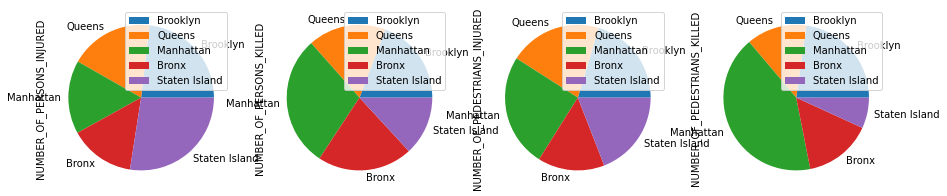

In [27]:
data.columns = ['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED','NUMBER_OF_PEDESTRIANS_INJURED','NUMBER_OF_PEDESTRIANS_KILLED']
data.index = ['Brooklyn', 'Queens', 'Manhattan', 'Bronx', 'Staten Island']
print(data)
plt.subplots_adjust(top=2.0)
plot = data.plot.pie(subplots=True, figsize=(15, 8), normalize=True)
plt.show()

The pie plots above indicate that the borough with the greatest average number of people killed was Manhattan, whereas the borough with the greatest average number of people injured was Staten Island. Looking at only the number of pedestrians injured/killed, a subset of the number of people injured/killed, we observe that Manhattan was the borough with the leading number of pedestrians injured/killed on average for a randomly selected crash.

### Part II: Selecting Factors that affect Crash Severity Level the most

In [28]:
print('Columns of the [crashData] Dataset: \n\n', crashData.columns)

Columns of the [crashData] Dataset: 

 Index(['CRASH_DATE_x', 'CRASH_TIME_x', 'BOROUGH', 'ZIP_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED',
       'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED',
       'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED',
       'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1',
       'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3',
       'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5',
       'UNIQUE_ID_x', 'CRASH_DATE_y', 'CRASH_TIME_y', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID_x', 'PERSON_AGE',
       'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITIO

Below, we write a function, for reusability purposes, to drop a given set of columns from an inputted dataset:

In [29]:
def drop_cols(df,cols):
    for col in cols:
        df.drop(col, inplace=True, axis=1)

In the following sub-section, we will analyze the association between vehicle type and crash severity of motor vehicle accidents in New York City. We define crash severity as the weighted sum of the number of people killed and injured combined for a particular accident, represented by the following expression:

$$\text{Crash Severity Level} = (2 \times \text{Number_Killed}) + (\text{Number_Injured}).$$

Note that in the expression above, double the weight is given to a person killed compared to a person injured.

We generate a new dataset, [crashDataNew], on which we will be performing most of our analysis below, so that the original data set, [crashData], does not get modified as a result, and when any of its original, untouched elements are needed, they can be accessed.

In [30]:
crashDataNew = crashData.copy()

In [31]:
crashDataNew.loc[:,'PERSONS_AFFECTED'] = 2 * crashDataNew['NUMBER_OF_PERSONS_KILLED'] + crashDataNew['NUMBER_OF_PERSONS_INJURED']
crashDataNew = crashDataNew.loc[(crashDataNew['PERSON_AGE'] >= 0.0) & (crashDataNew['PERSON_AGE'] <= 120.0)]

In [32]:
print('Duplicates of [COLLISION_ID] in Dataset:', crashDataNew['COLLISION_ID'].duplicated().any())

Duplicates of [COLLISION_ID] in Dataset: True


As we can see above, there are duplicates in the 'COLLISION_ID' field. This is a limitation with our dataset, as it is difficult to combine certain features for the instances with the same 'COLLISION_ID'. We will create another dataset, [crashDataNewDropped], that only keeps the first entry of each group of same Collision IDs, deleting the other entries.

In [33]:
print(crashDataNew.loc[crashDataNew['COLLISION_ID'] == 4377464]['PERSONS_AFFECTED'].count())
print(crashDataNew.loc[crashDataNew['COLLISION_ID'] == 4377464]['PERSONS_AFFECTED'].sum())
is_duplicate = crashDataNew.duplicated(subset=['COLLISION_ID','PERSONS_AFFECTED'], keep=False)
print('Before Dropping: \n', is_duplicate)
crashDataNewDropped = crashDataNew.drop_duplicates(['COLLISION_ID','PERSONS_AFFECTED'], keep='first')
is_duplicate = crashDataNewDropped.duplicated(subset=['COLLISION_ID','PERSONS_AFFECTED'], keep=False)
print('After Dropping: \n', is_duplicate)
print(crashDataNewDropped.loc[crashDataNewDropped['COLLISION_ID'] == 4377464]['PERSONS_AFFECTED'].count())
print(crashDataNewDropped.loc[crashDataNewDropped['COLLISION_ID'] == 4377464]['PERSONS_AFFECTED'].sum())

21
42.0
Before Dropping: 
 0          True
1          True
2          True
3          True
4          True
           ... 
1046617    True
1046618    True
1046619    True
1046620    True
1046621    True
Length: 1045933, dtype: bool
After Dropping: 
 0          False
4          False
25         False
49         False
57         False
           ...  
1046534    False
1046542    False
1046552    False
1046579    False
1046619    False
Length: 118997, dtype: bool
1
2.0


In [34]:
print('Duplicates of [COLLISION_ID] in Dataset:', crashDataNewDropped['COLLISION_ID'].duplicated().any())

Duplicates of [COLLISION_ID] in Dataset: False


We confirm that the operation performed above successfully dropped duplicates in the [COLLISION_ID] column. Later in our analysis, we will use both [crashDataNew] and [crashDataNewDropped] datasets, depending on the situation. For instance, in situations where we are analyzing a variable's association with crash severity, and the variable is the same for all parties involved in a particular crash, we will use the [crashDataNewDropped] dataset. In all other situations, we will use the [crashDataNew] dataset.

In [35]:
crashDataNewDropped.head()

,CRASH_DATE_x,CRASH_TIME_x,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1_y,CONTRIBUTING_FACTOR_2_y,BOROUGH_MAPPED,PERSONS_AFFECTED
0,2021-03-01,11:03,NOT AVAILABLE,10879.202855,40.667599,-73.819275,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,FRONT OF 410 STREET,...,No Damage,No Damage,No Damage,No Damage,N,NOT AVAILABLE,Unspecified,Unspecified,-1,1.0
4,2020-12-16,22:45,NOT AVAILABLE,10879.202855,40.667599,-73.819275,NOT AVAILABLE,SOUTH CONDUIT AVENUE,NOT AVAILABLE,NOT AVAILABLE,...,Center Front End,No Damage,No Damage,No Damage,N,NOT AVAILABLE,Pavement Slippery,Obstruction/Debris,-1,2.0
25,2021-02-26,8:55,NOT AVAILABLE,10879.202855,40.667599,-73.819275,NOT AVAILABLE,STATEN ISLAND EXPRESSWAY,NOT AVAILABLE,NOT AVAILABLE,...,Center Back End,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,N,NOT AVAILABLE,Unspecified,Unspecified,-1,1.0
49,2021-02-25,15:20,NOT AVAILABLE,10879.202855,40.667599,-73.819275,NOT AVAILABLE,HORACE HARDING EXPRESSWAY,NOT AVAILABLE,NOT AVAILABLE,...,Center Front End,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,N,NOT AVAILABLE,Following Too Closely,Driver Inattention/Distraction,-1,1.0
57,2021-02-25,17:45,NOT AVAILABLE,10879.202855,40.689194,-73.753650,"(40.689194, -73.75365)",120 AVENUE,196 STREET,NOT AVAILABLE,...,Center Front End,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,N,NOT AVAILABLE,Unspecified,Unspecified,-1,1.0


##### Asserting ['CRASH_DATE'] is Parsed to a DateTime Object in the ['crashDataNewDropped'] Dataset

In [36]:
crashDataNewDropped.loc[:,'CRASH_DATE'] = pd.to_datetime(crashDataNewDropped['CRASH_DATE'], format='%Y-%m-%d', errors='ignore')
assert crashDataNewDropped['CRASH_DATE'].dtype == 'datetime64[ns]'

<ipython-input-36-d656d90bbf91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashDataNewDropped['CRASH_DATE'] = pd.to_datetime(crashDataNewDropped['CRASH_DATE'], format='%Y-%m-%d', errors='ignore')


In [37]:
print(crashDataNewDropped.columns)

Index(['CRASH_DATE_x', 'CRASH_TIME_x', 'BOROUGH', 'ZIP_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED',
       'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED',
       'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED',
       'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1',
       'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3',
       'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5',
       'UNIQUE_ID_x', 'CRASH_DATE_y', 'CRASH_TIME_y', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID_x', 'PERSON_AGE',
       'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT

In [38]:
print('Maximum Number of People Affected in any Crash:', max(crashDataNew['PERSONS_AFFECTED']))

Maximum Number of People Affected in any Crash: 4.0


In [39]:
bins = [0, 2, np.inf]
names = [0, 1] # binned into two categories (one low and one high)
crashDataNew['PERSONS_AFFECTED_CATEGORIZED'] = pd.cut(crashDataNew['PERSONS_AFFECTED'], bins, labels=names)
crashDataNew.groupby('PERSONS_AFFECTED_CATEGORIZED').count()

,CRASH_DATE_x,CRASH_TIME_x,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1_y,CONTRIBUTING_FACTOR_2_y,BOROUGH_MAPPED,PERSONS_AFFECTED
PERSONS_AFFECTED_CATEGORIZED,,,,,,,,,,,,,,,,,,,,,
0,1044280,1044280,1044280,1044280,1044280,1044280,1044280,1044280,1044280,1044280,...,1044280,1044280,1044280,1044280,1044280,1044280,1044280,1044280,1044280,1044280
1,1653,1653,1653,1653,1653,1653,1653,1653,1653,1653,...,1653,1653,1653,1653,1653,1653,1653,1653,1653,1653


Since our dataset contains categorical variables, we will write the following function computing the Cramer's Correlation Coefficient given a confusion matrix of features, as this correlation measure is suited for analyzing associations with categorical features. In our analyses that follow, we will test this measure on the relationship between categorical variables in our dataset alongside with the standard Pearson and Spearman correlation coefficients.

In [40]:
# Function Computing Cramer's Correlation for Categorical Features
def cramers_v(confusion_matrix):
    chi2 = sp.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

#### Analyzing the General Association among Variables

<AxesSubplot:>

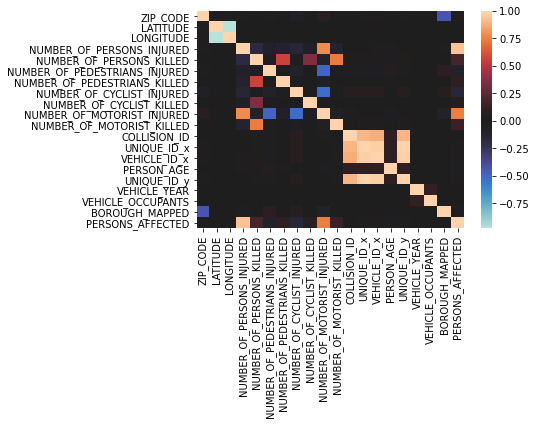

In [41]:
corr = crashDataNew.corr()
sns.heatmap(corr, vmax=1.0, center=0, xticklabels=corr.columns, yticklabels=corr.columns)

<AxesSubplot:>

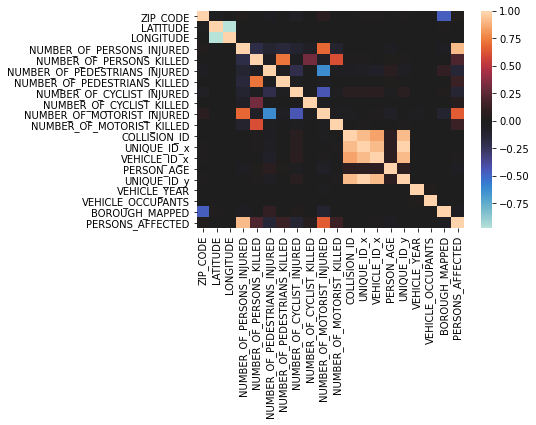

In [42]:
corr = crashDataNewDropped.corr()
sns.heatmap(corr, vmax=1.0, center=0, xticklabels=corr.columns, yticklabels=corr.columns)

The correlation heatmaps above tell us that most predictor variables had a close to zero correlation on the [PERSONS_AFFECTED] attribute, which as we mentioned above, represents the scale of the motor vehicle accident. However, the variables that had a correlation not close to 0 were the variables that were similar to the [PERSONS_AFFECTED] attribute, such as the number of people injured, the number of cyclists injured, etc. However, we can see that the borough does have a slightly negative correlation with the [PERSONS_AFFECTED] output variable. As a result, we will split the data up across the five boroughs and see if there are any differences across them.

Below, we provide the general code to plot relational and scatter plots given the [crashDataNew] dataset, for any predictor variable (passed as a parameter to the function), with response variable [PERSONS_AFFECTED].

#### Analyzing the Association among Gender, Age, Vehicle Year, and Crash Severity Level

<AxesSubplot:>

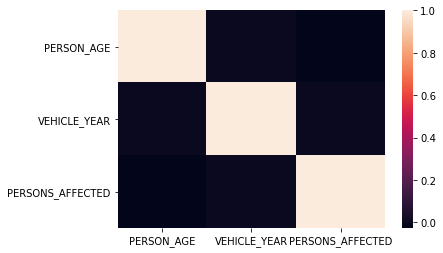

In [43]:
crashDataNewFiltered = crashDataNew[['PERSON_SEX','PERSON_AGE','VEHICLE_YEAR','PERSONS_AFFECTED']]
crashDataNewFiltered.head()
corr = crashDataNewFiltered.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [44]:
def barplot(pred):
    sns.barplot(x=crashDataNew[pred], y=crashDataNew['PERSONS_AFFECTED'], data=crashDataNew)

In [45]:
def relplot(pred):
    sns.relplot(data=crashDataNew, kind="line",
                x=crashDataNew[pred], y=crashDataNew['PERSONS_AFFECTED'], 
                facet_kws=dict(sharex=False),)

In [46]:
def scatterplot(pred):
    g = sns.scatterplot(data=crashDataNew, x=crashDataNew[pred], y=crashDataNew['PERSONS_AFFECTED'])
    g.set_xticklabels(rotation=90)

#### Persons Affected vs. Vehicle Year

What is the relationship between the age of the vehicle involved in a crash and the severity level of the crash? We will examine that below by plotting the changes in average crash severity level for each year from 1920 to 2020.

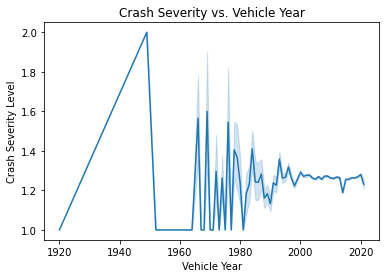

In [47]:
crashDataNew = crashDataNew[crashDataNew['VEHICLE_YEAR'] <= 2021]
sns.lineplot(data=crashDataNew, x=crashDataNew['VEHICLE_YEAR'], y=crashDataNew['PERSONS_AFFECTED'])
plt.xlabel('Vehicle Year')
plt.ylabel('Crash Severity Level')
plt.title('Crash Severity vs. Vehicle Year')
plt.show()

The plot above shows that there was an extreme average crash severity level for accidents involving cars that were built in the 1940s. After 1960, we can see a relatively stable graph, with the average crash severity level hovering approximately around a level of 1.2.

#### Analyzing the Association between Vehicle Type and Crash Severity

In this section, we analyze the association between vehicle type and the crash severity level, which is defined above.

In [48]:
crashDataNew['VEHICLE_TYPE'].unique()

array(['Station Wagon/Sport Utility Vehicle', 'Sedan', 'Pick-up Truck',
       '2 dr sedan', 'NOT AVAILABLE', 'Bike', 'Taxi', 'Bus',
       'Tractor Truck Diesel', 'Garbage or Refuse', 'Box Truck',
       'Motorbike', 'E-Scooter', 'Flat Bed', 'Dump', 'Motorcycle',
       'SNOW PLOW', 'PK', 'E-Bike', 'Van', 'trailer', 'van', 'scooter',
       'Van Camper', 'Motorscooter', 'Carry All', 'Moped', 'Convertible',
       'School Bus', 'Tractor Truck Gasoline', 'EXCAVATOR', 'Tanker',
       '4 dr sedan', 'Armored Truck', 'Refrigerated Van', 'Ambulance',
       'Scooter', 'USPS TRUCK', 'E-BIKE', 'VAN TRUCK', '3-Door',
       'Lift Boom', 'Tow Truck / Wrecker', 'Open Body', 'PICK UP TR',
       'LIMO', 'US POSTAL', 'Forklift', 'Snow Plow', 'Chassis Cab',
       'FIRE TRUCK', 'BULLDOZER', 'truck', 'Stake or Rack', 'semitraile',
       'AMBULETTE', 'SCOOTER', 'Beverage Truck', 'Flat Rack', 'VS2',
       'AMBULANCE', 'TRACTOR', 'box truck', 'FDNY FIRE', 'FIRE ENGIN',
       'PICKUP', 'DUMP', 'Minib

In [49]:
'''
crashDataNewCopy = crashDataNew.copy()
vehicle_types = crashDataNew['VEHICLE_TYPE'].unique()
for ft in vehicle_types:
    if len(crashDataNew[crashDataNew['VEHICLE_TYPE'] == ft])/len(crashDataNew) < 0.1:
        crashDataNewCopy = crashDataNewCopy[crashDataNewCopy['VEHICLE_TYPE'] != ft]
'''

"\ncrashDataNewCopy = crashDataNew.copy()\nvehicle_types = crashDataNew['VEHICLE_TYPE'].unique()\nfor ft in vehicle_types:\n    if len(crashDataNew[crashDataNew['VEHICLE_TYPE'] == ft])/len(crashDataNew) < 0.1:\n        crashDataNewCopy = crashDataNewCopy[crashDataNewCopy['VEHICLE_TYPE'] != ft]\n"

In [50]:
#filtered_vehicle_types = crashDataNewCopy['VEHICLE_TYPE'].unique()
filtered_vehicle_types = ['Station Wagon/Sport Utility Vehicle', 'Sedan']
print(filtered_vehicle_types)

['Station Wagon/Sport Utility Vehicle', 'Sedan']


Below, we will measure the association between the variables by finding and interpreting the Spearman correlation coefficient between the two variables. Note that we use the Spearman correlation coefficient instead of the Pearson correlation coefficient since the relationship between the variables is not linear.

In [51]:
crashDataNew['VEHICLE_TYPE_MAPPED'] = crashDataNew['VEHICLE_TYPE'].map({'Station Wagon/Sport Utility Vehicle':0,'Sedan':1})
corr, _ = spearmanr(crashDataNew['VEHICLE_TYPE_MAPPED'], crashDataNew['PERSONS_AFFECTED'])
print('Correlation Coefficient b/w Vehicle Type and Crash Severity Level:', round(corr,2))

Correlation Coefficient b/w Vehicle Type and Crash Severity Level: -0.05


The correlation coefficient of 0 above signifies that there is no correlation between vehicle type and the crash severity level.

In [52]:
def get_sizes(types):
    sizes = []
    for tp in types:
        sizes.append(crashDataNew[crashDataNew['VEHICLE_TYPE'] == tp]['PERSONS_AFFECTED'].sum())
    sizes = list((np.array(sizes)/np.sum(np.array(sizes))) * 100)
    return sizes

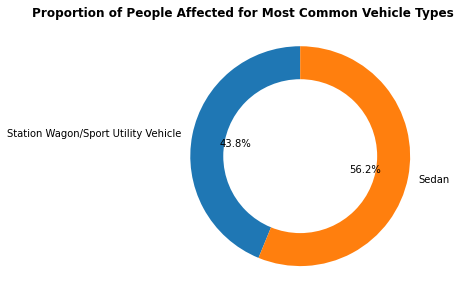

In [53]:
types = filtered_vehicle_types
labels = types
sizes = get_sizes(types)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
fig.suptitle('Proportion of People Affected for Most Common Vehicle Types', fontweight="bold")
plt.tight_layout()
plt.show()

The pie chart above indicates that Sedan vehicles had the greatest number of people affected, and thus the greatest crash severity level, out of the relatively common vehicle types involved in NYC motor vehicle crashes, which were found to be Sedan and Station Wagon/Sport Utility vehicles.

#### Analyzing the Association between Safety Equipment Use and Crash Severity

In [54]:
crashDataNew['SAFETY_EQUIPMENT'].unique()

array(['NOT AVAILABLE', 'None', 'Lap Belt & Harness', 'Lap Belt', 'Other',
       'Unknown', 'Helmet Only (In-Line Skater/Bicyclist)',
       'Air Bag Deployed', 'Air Bag Deployed/Lap Belt/Harness',
       'Helmet (Motorcycle Only)', 'Air Bag Deployed/Child Restraint',
       'Child Restraint Only', 'Helmet/Other (In-Line Skater/Bicyclist)',
       'Air Bag Deployed/Lap Belt', 'Harness',
       'Stoppers Only (In-Line Skater/Bicyclist)',
       'Pads Only (In-Line Skater/Bicyclist)'], dtype=object)

##### Testing for a Linear Relationship

In [55]:
crashDataNew['PERSONS_AFFECTED'] = crashDataNew['PERSONS_AFFECTED'].dropna()
crashDataNew['SAFETY_EQUIPMENT'] = crashDataNew['SAFETY_EQUIPMENT'].dropna()

confusion_matrix = pd.crosstab(crashDataNew['SAFETY_EQUIPMENT'], crashDataNew['PERSONS_AFFECTED'])
print('Cramers Correlation b/w Safety Equipment and Crash Severity Level:', cramers_v(confusion_matrix.values))

crashDataNew['SAFETY_EQUIPMENT'] = crashDataNew['SAFETY_EQUIPMENT'].map({'NOT AVAILABLE':0,'None':1,
                                                                   'Lap Belt & Harness':2,'Lap Belt':3,
                                                                   'Other':4,'Unknown':5,
                                                                   'Helmet Only (In-Line Skater/Bicyclist)':6,
                                                                   'Air Bag Deployed':7,
                                                                   'Air Bag Deployed/Lap Belt/Harness':8,
                                                                   'Helmet (Motorcycle Only)':9,
                                                                   'Air Bag Deployed/Child Restraint':10,
                                                                   'Child Restraint Only':11,'Helmet/Other (In-Line Skater/Bicyclist)':12,
                                                                   'Air Bag Deployed/Lap Belt':13, 'Harness':14, 
                                                                   'Stoppers Only (In-Line Skater/Bicyclist)':15, 'Pads Only (In-Line Skater/Bicyclist)':16
                                                                  })

corr, _ = spearmanr(crashDataNew['SAFETY_EQUIPMENT'], crashDataNew['PERSONS_AFFECTED'])
print('Spearman Correlation Coefficient b/w Safety Equipment and Crash Severity Level:', round(corr,2))

Cramers Correlation b/w Safety Equipment and Crash Severity Level: 0.03381162791822443
Spearman Correlation Coefficient b/w Safety Equipment and Crash Severity Level: 0.04


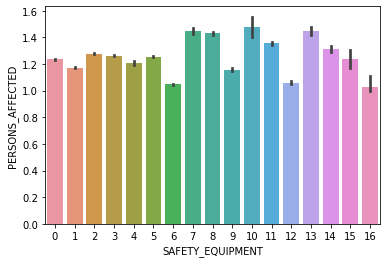

In [56]:
barplot('SAFETY_EQUIPMENT')
plt.show()

From the bar chart above, we can see that SAFETY_EQUIPMENT = 7, 8, 10, 13 are mapped to 'Air Bag Deployed', 'Air Bag Deployed/Lap Belt/Harness', 'Air Bag Deployed/Child Restraint', and 'Air Bag Deployed/Lap Belt' respectively, corresponded to the safety equipments with the greatest average number of people affected for a randomly chosen crash by a visibly large margin compared to the other safety equipments. Hence, this information by itself indicates that since 'Air Bag Deployed' was a common characteristic in all four equipments, it is therefore the safety equipment corresponding to the greatest average number of people affected per randomly selected crash.

This result could possibly be explained by the fact that air bags are only deployed in relatively large-scale crashes. However, at the same time, the air bags might not be as effective, especially in more severe crashes.

#### Analyzing the Association between Age Group and Crash Severity

In [57]:
crashDataNew.head()

,CRASH_DATE_x,CRASH_TIME_x,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1_y,CONTRIBUTING_FACTOR_2_y,BOROUGH_MAPPED,PERSONS_AFFECTED,PERSONS_AFFECTED_CATEGORIZED,VEHICLE_TYPE_MAPPED
0,2021-03-01,11:03,NOT AVAILABLE,10879.202855,40.667599,-73.819275,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,FRONT OF 410 STREET,...,No Damage,No Damage,N,NOT AVAILABLE,Unspecified,Unspecified,-1,1.0,0,0.0
1,2021-03-01,11:03,NOT AVAILABLE,10879.202855,40.667599,-73.819275,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,FRONT OF 410 STREET,...,No Damage,No Damage,N,NOT AVAILABLE,Unspecified,Unspecified,-1,1.0,0,0.0
2,2021-03-01,11:03,NOT AVAILABLE,10879.202855,40.667599,-73.819275,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,FRONT OF 410 STREET,...,No Damage,No Damage,N,NOT AVAILABLE,Unspecified,Unspecified,-1,1.0,0,0.0
3,2021-03-01,11:03,NOT AVAILABLE,10879.202855,40.667599,-73.819275,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,FRONT OF 410 STREET,...,No Damage,No Damage,N,NOT AVAILABLE,Unspecified,Unspecified,-1,1.0,0,0.0
4,2020-12-16,22:45,NOT AVAILABLE,10879.202855,40.667599,-73.819275,NOT AVAILABLE,SOUTH CONDUIT AVENUE,NOT AVAILABLE,NOT AVAILABLE,...,No Damage,No Damage,N,NOT AVAILABLE,Pavement Slippery,Obstruction/Debris,-1,2.0,0,1.0


##### Measuring Correlation on Uncategorized [PERSONS_AFFECTED] Field

In [58]:
crashDataNew['PERSON_AGE'] = crashDataNew['PERSON_AGE'].dropna()
pd.cut(crashDataNew['PERSON_AGE'], 4)
corr, _ = spearmanr(crashDataNew['PERSON_AGE'], crashDataNew['PERSONS_AFFECTED'])
print('Correlation Coefficient b/w Age Group and Injury Severity Level:', round(corr,2))

Correlation Coefficient b/w Age Group and Injury Severity Level: -0.03


##### Measuring Correlation on Categorized [PERSONS_AFFECTED] Field

In [59]:
corr, _ = spearmanr(crashDataNew['PERSON_AGE'], crashDataNew['PERSONS_AFFECTED_CATEGORIZED'])
print('Correlation Coefficient b/w Age Group and Crash Severity Level:', round(corr,2))

Correlation Coefficient b/w Age Group and Crash Severity Level: 0.0


The results above indicate that the correlation between all person age and the scale of the motor accident was very weakly correlated, in the case that we did not categorize the age group as well as in the case that we did categorize the age group.

#### Analyzing the Association between Gender and Crash Severity

In [60]:
crashDataNew['PERSON_SEX'].unique()

array(['NOT AVAILABLE', 'F', 'M', 'U'], dtype=object)

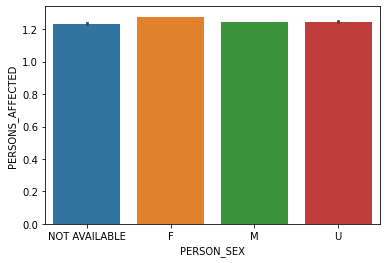

In [61]:
sns.barplot(x=crashDataNew['PERSON_SEX'], y=crashDataNew['PERSONS_AFFECTED'], data=crashDataNew)
plt.show()

In [62]:
map_gender = {'M':0, 'F':1, 'U':2}
crashDataNew['PERSON_SEX_MAPPED'] = crashDataNew['PERSON_SEX'].map(map_gender)
corr, _ = spearmanr(crashDataNew['PERSON_SEX_MAPPED'], crashDataNew['PERSONS_AFFECTED_CATEGORIZED'])
print('Spearman Correlation Coefficient b/w Gender and Crash Severity Level:', round(corr,2))

Spearman Correlation Coefficient b/w Gender and Crash Severity Level: 0.01


In [63]:
confusion_matrix = pd.crosstab(crashDataNew['PERSON_SEX'], crashDataNew['PERSONS_AFFECTED'])
print('Cramers Correlation b/w Gender and Crash Severity Level:', cramers_v(confusion_matrix.values))

Cramers Correlation b/w Gender and Crash Severity Level: 0.025337847519753907


As we can see above, similar to many of the factors analyzed above, both correlation measures between gender and crash severity are extremely low, indicating that there is no significant relationship between gender and the crash severity level. However, from the bar chart produced above, we can see that the average number of people affected for a randomly chosen crash was slightly greater for females compared to the other gender groups.

#### Analyzing the Correlation between Human-Controllable Factors and Crash Severity

In [64]:
crashDataNew = crashDataNew[crashDataNew['DRIVER_LICENSE_STATUS'] != 'NOT AVAILABLE']
crashDataNew['DRIVER_LICENSE_STATUS'].unique()

array(['Licensed', 'Permit', 'Unlicensed'], dtype=object)

In [65]:
crashDataNew.columns.unique()

Index(['CRASH_DATE_x', 'CRASH_TIME_x', 'BOROUGH', 'ZIP_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED',
       'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED',
       'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED',
       'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1',
       'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3',
       'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5',
       'UNIQUE_ID_x', 'CRASH_DATE_y', 'CRASH_TIME_y', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID_x', 'PERSON_AGE',
       'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT

In [66]:
crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'].unique()

array(['Unspecified', 'Pavement Slippery', 'Following Too Closely',
       'Pavement Defective', 'Failure to Yield Right-of-Way',
       'Passing or Lane Usage Improper', 'Driver Inattention/Distraction',
       'Turning Improperly', 'Reaction to Uninvolved Vehicle',
       'Unsafe Speed', 'Lost Consciousness', 'Unsafe Lane Changing',
       'Illnes', 'Fell Asleep', 'Driver Inexperience',
       'Traffic Control Disregarded', 'Oversized Vehicle',
       'View Obstructed/Limited',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Obstruction/Debris', 'Backing Unsafely',
       'Aggressive Driving/Road Rage', 'Other Vehicular',
       'Drugs (illegal)', 'Outside Car Distraction', 'Brakes Defective',
       'Alcohol Involvement', 'Passing Too Closely', 'Steering Failure',
       'Traffic Control Device Improper/Non-Working',
       'Passenger Distraction', 'Glare', 'Physical Disability',
       'Fatigued/Drowsy', 'Failure to Keep Right',
       'Accelerator Defective

/Users/rayanwali/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/rayanwali/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Correlation Coefficient b/w Contributing Factor and Injury Severity Level: -0.08


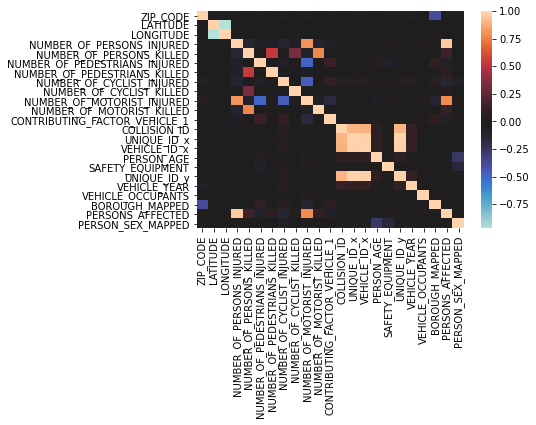

In [67]:
crashDataNewHuman = crashDataNew[(crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Drugs (illegal)') | 
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Aggressive Driving/Road Rage') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Alcohol Involvement') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Cell Phone (hands-free)') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Eating or Drinking') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Listening/Using Headphones') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Fell Asleep') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Unsafe Speed') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Lost Consciouness') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Unsafe Lane Changing') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Following Too Closely') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Driver Inattention/Distraction') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Passing Too Closely') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Illnes') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Failure to Yield Right-of-Way') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Driver Inexperience') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Texting') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Passenger Distraction') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Failure to Keep Right') |
                                (crashDataNew['CONTRIBUTING_FACTOR_VEHICLE_1'] == 'Fatigued/Drowsy')
                                ]
map_human_factor = {'Drugs (illegal)':0,'Aggressive Driving/Road Rage':1, 'Alcohol Involvement':2,'Cell Phone (hands-free)':3,
                    'Eating or Drinking':4,'Listening/Using Headphones':5,'Fell Asleep':6,'Unsafe Speed':7,
                    'Lost Consciouness':8,'Unsafe Lane Changing':9, 'Following Too Closely':10,'Driver Inattention/Distraction':11,
                    'Passing Too Closely':12,'Illnes':13, 'Failure to Yield Right-of-Way':14,'Driver Inexperience':15, 
                    'Texting':16,'Passenger Distraction':17, 'Failure to Keep Right':18, 'Fatigued/Drowsy':19 }
crashDataNewHuman.loc[:,'CONTRIBUTING_FACTOR_VEHICLE_1'] = crashDataNewHuman['CONTRIBUTING_FACTOR_VEHICLE_1'].map(map_human_factor)
drop_cols(crashDataNewHuman,['VEHICLE_TYPE_MAPPED'])
corr = crashDataNewHuman.corr()
sns.heatmap(corr, vmax=1.0, center=0, xticklabels=corr.columns, yticklabels=corr.columns)
corr, _ = spearmanr(crashDataNewHuman['CONTRIBUTING_FACTOR_VEHICLE_1'], crashDataNewHuman['PERSONS_AFFECTED'])
print('Correlation Coefficient b/w Contributing Factor and Injury Severity Level:', round(corr,2))

#### Analyzing the Association between Driver License Status and Crash Severity

In [68]:
crashDataNew['DRIVER_LICENSE_STATUS'] = crashDataNew['DRIVER_LICENSE_STATUS'].dropna()
crashDataNew['DRIVER_LICENSE_STATUS_MAPPED'] = crashDataNew['DRIVER_LICENSE_STATUS'].map({'Unlicensed':0,'Permit':1,'Licensed':2})
corr, _ = spearmanr(crashDataNew['DRIVER_LICENSE_STATUS_MAPPED'], crashDataNew['PERSONS_AFFECTED'])
print('Correlation Coefficient b/w Driver License Status and Crash Severity Level:', round(corr,2))

Correlation Coefficient b/w Driver License Status and Crash Severity Level: 0.01


Now, we will re-measure the association between all the variables analyzed above, but this time, split by the five boroughs of NYC. From this, we will be able to assess whether the correlation between the selected features and the crash severity level is different across the five boroughs or not, and from this result, we will be able to decide how we want to analyze the relationships between the selected features and the crash severity level appropriately.

Below, we measure the correlation between the mapped driver license status field and the categorized crash severity level.

In [69]:
corr, _ = spearmanr(crashDataNew['DRIVER_LICENSE_STATUS_MAPPED'], crashDataNew['PERSONS_AFFECTED_CATEGORIZED'])
print(crashDataNew.columns.unique())
print('Correlation between Driver License Status and People Affected:', corr)

Index(['CRASH_DATE_x', 'CRASH_TIME_x', 'BOROUGH', 'ZIP_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED',
       'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED',
       'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED',
       'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1',
       'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3',
       'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5',
       'UNIQUE_ID_x', 'CRASH_DATE_y', 'CRASH_TIME_y', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID_x', 'PERSON_AGE',
       'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT

Comparing the two correlation scores above, there is not a significant difference between them, and thus, dividing the number of people affected into two categories did not affect the correlation with driver license status.

#### Re-analyzing the General Association among Variables (this time, split by borough)

In [70]:
crashDataNew['BOROUGH'].unique()

array(['NOT AVAILABLE', 'BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX',
       'STATEN ISLAND'], dtype=object)

In [71]:
crashDataNew['BOROUGH_MAPPED'].unique()

array([-1,  0,  1,  2,  3,  4])

In [72]:
crashDataNewQueens = crashDataNew[crashDataNew['BOROUGH_MAPPED'] == 0]
crashDataNewBrooklyn = crashDataNew[crashDataNew['BOROUGH_MAPPED'] == 1]
crashDataNewManhattan = crashDataNew[crashDataNew['BOROUGH_MAPPED'] == 2]
crashDataNewStatenIsland = crashDataNew[crashDataNew['BOROUGH_MAPPED'] == 3]
crashDataNewBronx = crashDataNew[crashDataNew['BOROUGH_MAPPED'] == 4]

In [73]:
def heatmap_by_borough(crashDataNew_Br):
    drop_cols(crashDataNew_Br,['BOROUGH_MAPPED','VEHICLE_TYPE','VEHICLE_TYPE_MAPPED','NUMBER_OF_CYCLIST_KILLED'])
    corr = crashDataNew_Br.corr()
    sns.heatmap(corr, vmax=1.0, center=0, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()

Queens Borough Correlation Heat Map: 



/Users/rayanwali/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


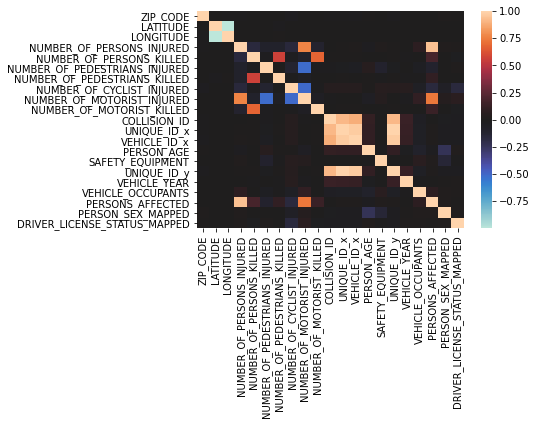

Brooklyn Borough Correlation Heat Map: 



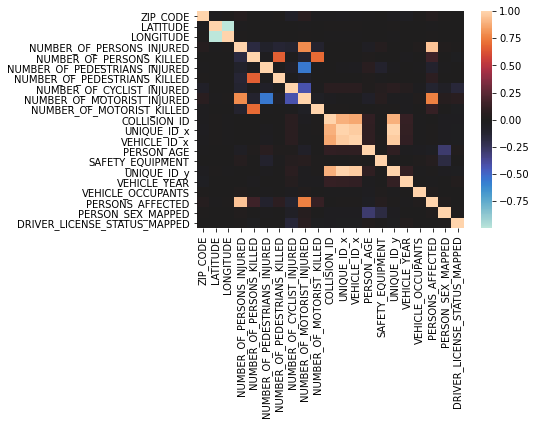

Manhattan Borough Correlation Heat Map: 



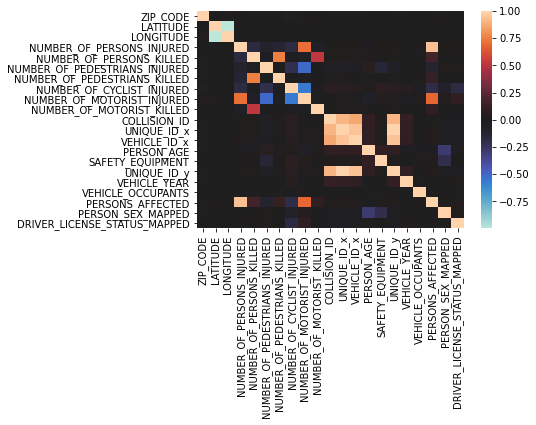

Staten Island Borough Correlation Heat Map: 



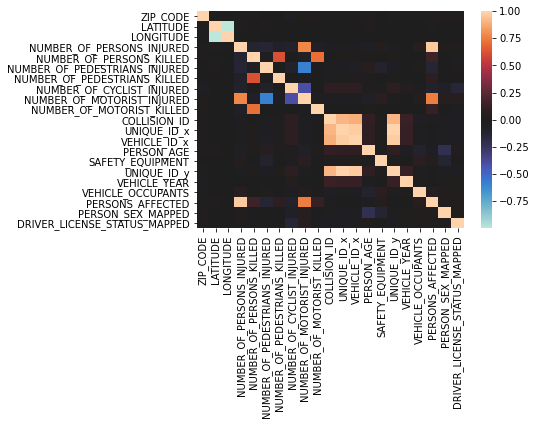

Bronx Borough Correlation Heat Map: 



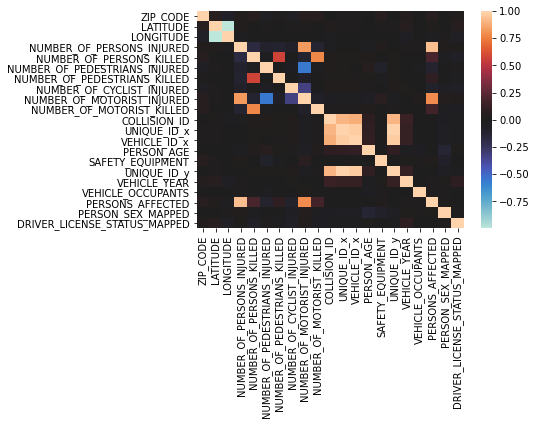

In [74]:
dict = {'Queens':crashDataNewQueens,'Brooklyn':crashDataNewBrooklyn,'Manhattan':crashDataNewManhattan,'Staten Island':crashDataNewStatenIsland,'Bronx':crashDataNewBronx}
for br in dict:
    print(br,'Borough Correlation Heat Map: \n')
    heatmap_by_borough(dict[br])

The heatmaps above, one produced for each of the five boroughs, indicate that splitting the entire NYC data by the five boroughs did not affect the pairwise correlations in any way; they still remained low values.

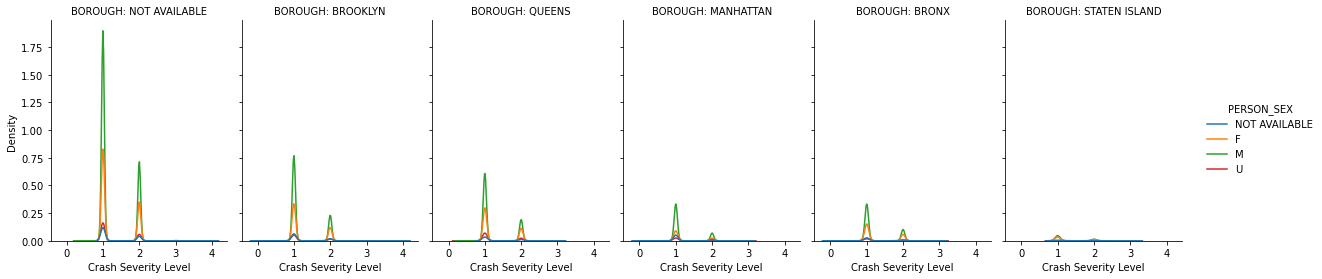

In [75]:
g = sns.displot(
    data=crashDataNew, x=crashDataNew['PERSONS_AFFECTED'], hue=crashDataNew['PERSON_SEX'], col=crashDataNew['BOROUGH'],
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("Crash Severity Level", "Density")
g.set_titles("BOROUGH: {col_name}")

The density plots above indicate that the proportion of the total individuals involved in a motor vehicle crash in NYC was higher for males compared to females for all boroughs, with unisex individuals having the lowest proportion.

#### Analyzing the Association between Day Type and Crash Severity

As a first step of analyzing the association between day type and crash severity, we analyze the structure of the ['CRASH_DATE'] field, so that we are able to accordingly translate the crash date to the day of the week used for our analysis.

In [76]:
crashDataNewDropped['CRASH_DATE'].head()

0    2021-03-01
4    2020-12-16
25   2021-02-26
49   2021-02-25
57   2021-02-25
Name: CRASH_DATE, dtype: datetime64[ns]

In [77]:
crashDataNewDropped['CRASH_DAY_OF_WEEK'] = crashDataNewDropped['CRASH_DATE'].dt.dayofweek
crashDataNewDropped['IS_WEEKDAY'] = ((crashDataNewDropped['CRASH_DAY_OF_WEEK']) // 5 == 1).astype(float)
corr, _ = spearmanr(crashDataNewDropped['IS_WEEKDAY'], crashDataNewDropped['PERSONS_AFFECTED'])
print('Correlation Coefficient b/w Weekday vs. Weekend Motor Vehicle Accidents and Crash Severity Level:', round(corr,2))

Correlation Coefficient b/w Weekday vs. Weekend Motor Vehicle Accidents and Crash Severity Level: 0.03


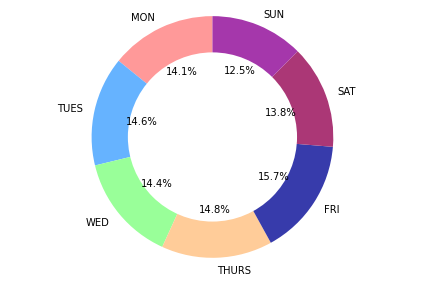

In [78]:
mon = crashDataNewDropped[crashDataNewDropped['CRASH_DAY_OF_WEEK'] == 0]['PERSONS_AFFECTED'].sum()
tues = crashDataNewDropped[crashDataNewDropped['CRASH_DAY_OF_WEEK'] == 1]['PERSONS_AFFECTED'].sum()
wed = crashDataNewDropped[crashDataNewDropped['CRASH_DAY_OF_WEEK'] == 2]['PERSONS_AFFECTED'].sum()
thurs = crashDataNewDropped[crashDataNewDropped['CRASH_DAY_OF_WEEK'] == 3]['PERSONS_AFFECTED'].sum()
fri = crashDataNewDropped[crashDataNewDropped['CRASH_DAY_OF_WEEK'] == 4]['PERSONS_AFFECTED'].sum()
sat = crashDataNewDropped[crashDataNewDropped['CRASH_DAY_OF_WEEK'] == 5]['PERSONS_AFFECTED'].sum()
sun = crashDataNewDropped[crashDataNewDropped['CRASH_DAY_OF_WEEK'] == 6]['PERSONS_AFFECTED'].sum()
tot = mon + tues + wed + thurs + fri + sat + sun
monSize = mon/tot
tuesSize = tues/tot
wedSize = wed/tot
thursSize = thurs/tot
friSize = fri/tot
satSize = sat/tot
sunSize = sun/tot
labels = ['MON', 'TUES', 'WED', 'THURS', 'FRI', 'SAT', 'SUN']
sizes = [monSize, tuesSize, wedSize, thursSize, friSize, satSize, sunSize]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#373bab','#ab3776','#a537ab']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.show()

As we can observe in the pie plot above, the crash severity level across the seven days of the week is roughly uniformly distributed. Hence, from this information, we can conlude that there is no difference in crash severity level across the seven days of the week. From this plot, we can also see the distribution of crash severity level on weekdays (Monday through Friday) compared to the weekend days (Saturday and Sunday). Since the pie chart contains a larger percentage-based area for weekdays than weekends, we can conlude that more people were affected by motor vehicle crashes in NYC in total on weekdays compared to weekends.

#### Analyzing the Association between Motor Vehicle Accident Time and Crash Severity

In [79]:
crashDataNewDropped['CRASH_TIME_PARSED'] = crashDataNewDropped['CRASH_TIME'].apply(lambda x: '{0:0>4}'.format(x))
print(crashDataNewDropped['CRASH_TIME_PARSED'].head(), '\n')
crashDataNewDropped['IS_DAYTIME'] = crashDataNewDropped['CRASH_TIME_PARSED'].copy()
for idx in range(len(crashDataNewDropped['CRASH_TIME_PARSED'])):
    crashDataNewDropped['IS_DAYTIME'].iloc[idx] = int(crashDataNewDropped['CRASH_TIME_PARSED'].iloc[idx].split(':')[0]) < 12
crashDataNew['IS_DAYTIME'] = crashDataNewDropped['IS_DAYTIME']
print(crashDataNewDropped['IS_DAYTIME'].head())

0     11:03
4     22:45
25     8:55
49    15:20
57    17:45
Name: CRASH_TIME_PARSED, dtype: object 



/Users/rayanwali/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0      True
4     False
25     True
49    False
57    False
Name: IS_DAYTIME, dtype: object


In [80]:
corr, _ = spearmanr(crashDataNewDropped['IS_DAYTIME'], crashDataNewDropped['PERSONS_AFFECTED'])
print('Correlation Coefficient b/w Motor Vehicle Accident Time and Crash Severity Level:', round(corr,2))

Correlation Coefficient b/w Motor Vehicle Accident Time and Crash Severity Level: 0.01


As we can see by the low Spearman correlation score above, there is very little association between the motor vehicle accident time and the crash severity level.

### Part III: Predicting the Scale of Motor Vehicle Crashes

### Selecting a Model to Fit the Data

Even though the correlations obtained above with the crash severity level are low, they are not necessarily an indicator of prediction. For example, complex relationships can be captured by a particular complex model that is not reflected in the pairwise correlation scores. In this section, we perform model selection by choosing hypotheses that might be suited to represent this form of data, and use them to predict the crash severity level on new motor vehicle crashes.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

Below, we write a function to compute the training error for a particular classifier, and a sample set from a distribution $P$: $X$ x $Y$:

In [82]:
def compute_training_error(clf2,X,y):
    train_error = np.sum(clf2.predict(X) != y)/len(X)
    return train_error

Below, we write a function to compute the cross-validation error given a dataset split into a set of feature vectors $X$ and a set of labels $y$. Specifically, the cross-validation error computed below is a form of the mean-squared-error (MSE) $k$-fold cross validation error with $k = 10$.

In [83]:
def compute_validation_error(clf2,X,y):
    return np.abs(np.mean(cross_val_score(clf2,X,y,cv=10)))

In [84]:
X = crashDataNew[['SAFETY_EQUIPMENT']]
y = crashDataNew['PERSONS_AFFECTED']

In [85]:
print('Average Age of those involved in a Crash:', np.mean(crashDataNew['PERSON_AGE']))

Average Age of those involved in a Crash: 36.10202201704422


#### Model #1: Multivariate Linear Regression

We will train our multivariate linear regression model with the predictor variables ['PERSON_AGE'] AND ['VEHICLE_YEAR']. We select these features since these are naturally numerical-valued features, and are not categorical variables that need special attention or need to be mapped. We will instead use the categorical variables in the models below that are more appropriate for such feature types.

In [86]:
X = crashDataNew[['PERSON_AGE','VEHICLE_YEAR']]
y = crashDataNew['PERSONS_AFFECTED']
regLinear = LinearRegression().fit(X,y)
predLinear = regLinear.predict(X)
print('Linear Regression Model Score:', regLinear.score(X,y))

Linear Regression Model Score: 0.0007795057119823756


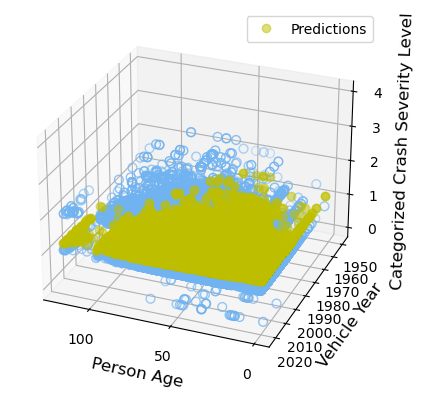

In [87]:
plt.style.use('default')
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(131, projection='3d')

ax.scatter(crashDataNew['PERSON_AGE'], crashDataNew['VEHICLE_YEAR'], crashDataNew['PERSONS_AFFECTED'], facecolor=(0,0,0,0), s=40, edgecolor='#70b3f0')
ax.legend(['True Values'])
ax.plot(crashDataNew['PERSON_AGE'], crashDataNew['VEHICLE_YEAR'], predLinear, color='y', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.legend(['Predictions'])
ax.set_xlabel('Person Age', fontsize=12)
ax.set_ylabel('Vehicle Year', fontsize=12)
ax.set_zlabel('Categorized Crash Severity Level', fontsize=12)
ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

ax.view_init(elev=27, azim=112)
fig.tight_layout()

#### Model #2: Decision Tree Regressor

Below, we train a decision tree regression model with predictor variables being the person age and the safety equipment in the car at the time of the crash and the response variable being the scale of the motor vehicle crash. We will identify the training error of such a model, and we will also predict the number of persons affected field for a person's age of 40 and a safety equipment being 'Air Bag Deployed/Lap Belt' (which is being mapped to the integer '13').

In [88]:
clf = tree.DecisionTreeRegressor()
clf.fit(crashDataNew[['PERSON_AGE','SAFETY_EQUIPMENT']], crashDataNew['PERSONS_AFFECTED'])
print('Decision Tree Training Error:', compute_training_error(clf,crashDataNew[['PERSON_AGE','SAFETY_EQUIPMENT']],crashDataNew['PERSONS_AFFECTED']))
print('Decision Tree Validation Error:', compute_validation_error(clf,crashDataNew[['PERSON_AGE','SAFETY_EQUIPMENT']],crashDataNew['PERSONS_AFFECTED']))
print('Predicted Value:', clf.predict([[40,13]])[0])

Decision Tree Training Error: 0.9978111898321491
Decision Tree Validation Error: 0.0038162186531701
Predicted Value: 1.4285714285714286


For this particular combination of features, the decision tree labeled such an instance to have a crash severity level of 1.444 from a crash severity scale ranging from 0 to 4. Such a crash severity level value gets mapped to the 'low' crash severity category, as in the mapping from the 'PERSONS_AFFECTED' field to the crash severity scale above that produced the 'low' and 'high' bins, stored in the 'PERSONS_AFFECTED_CATEGORIZED' field.

In [89]:
print(crashDataNew['DRIVER_LICENSE_STATUS'].isnull().unique())
crashDataNew['DRIVER_LICENSE_STATUS'] = crashDataNew['DRIVER_LICENSE_STATUS'].dropna()
print(crashDataNew['DRIVER_LICENSE_STATUS'].isnull().unique())

[False]
[False]


#### Model #3: Decision Tree Classifier

##### Testing a Subset of Features

Decision Tree Training Error: 0.0011875214828729053
Decision Tree Validation Error: 0.9988124785210776
Prediction for a Driver License Status of those Unlicensed: 0
Prediction for a Driver License Status of those with a Permit: 0
Prediction for a Driver License Status of those Licensed: 0


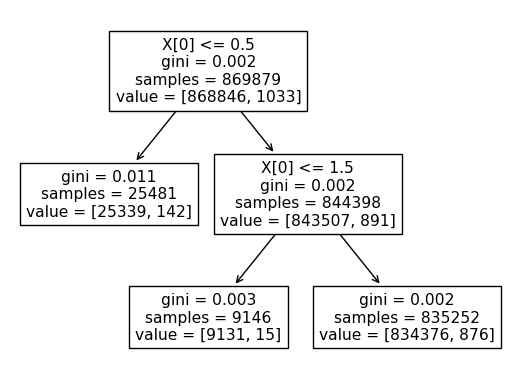

In [90]:
clf = tree.DecisionTreeClassifier()
clf.fit(crashDataNew[['DRIVER_LICENSE_STATUS_MAPPED']], crashDataNew['PERSONS_AFFECTED_CATEGORIZED'])
print('Decision Tree Training Error:', compute_training_error(clf,crashDataNew[['DRIVER_LICENSE_STATUS_MAPPED']],crashDataNew['PERSONS_AFFECTED_CATEGORIZED']))
print('Decision Tree Validation Error:', compute_validation_error(clf,crashDataNew[['DRIVER_LICENSE_STATUS_MAPPED']],crashDataNew['PERSONS_AFFECTED_CATEGORIZED']))
tree.plot_tree(clf)
print('Prediction for a Driver License Status of those Unlicensed:', clf.predict([[0]])[0])
print('Prediction for a Driver License Status of those with a Permit:', clf.predict([[1]])[0])
print('Prediction for a Driver License Status of those Licensed:', clf.predict([[2]])[0])

The decision tree model, for all three driver license level status, predicted a categorized crash severity level of '0', which represents 'Low'. This method shows us that there is no significant difference on average in the categorized crash severity level among the three driver license status levels (note that there may still be minor differences, but since the driver license field was binned into the two levels 'Low' and 'High', we do not see those differences from comparing the predicted values as we are doing here).

##### Testing All Features

In [91]:
clf = tree.DecisionTreeClassifier()
clf.fit(crashDataNew[['DRIVER_LICENSE_STATUS_MAPPED','PERSON_AGE','VEHICLE_YEAR','SAFETY_EQUIPMENT']], crashDataNew['PERSONS_AFFECTED_CATEGORIZED'])
print('Decision Tree Training Error:', compute_training_error(clf,crashDataNew[['DRIVER_LICENSE_STATUS_MAPPED','PERSON_AGE','VEHICLE_YEAR','SAFETY_EQUIPMENT']],crashDataNew['PERSONS_AFFECTED_CATEGORIZED']))
print('Decision Tree Validation Error:', compute_validation_error(clf,crashDataNew[['DRIVER_LICENSE_STATUS_MAPPED','PERSON_AGE','VEHICLE_YEAR','SAFETY_EQUIPMENT']],crashDataNew['PERSONS_AFFECTED_CATEGORIZED']))
print('Prediction for a Driver License Status of those Unlicensed:', clf.predict([[0,40,2015,5]])[0])
print('Prediction for a Driver License Status of those with a Permit:', clf.predict([[1,40,2015,5]])[0])
print('Prediction for a Driver License Status of those Licensed:', clf.predict([[2,40,2015,5]])[0])

Decision Tree Training Error: 0.0011300422242633745
Decision Tree Validation Error: 0.9987090158687948
Prediction for a Driver License Status of those Unlicensed: 0
Prediction for a Driver License Status of those with a Permit: 0
Prediction for a Driver License Status of those Licensed: 0


We can observe that fitting the decision tree model with all the features resulted in similar training and validation error scores as well as predictions that were similar to the decision tree model constructed earlier fit with a single feature, the mapped driver license status.

#### Model #4: Support Vector Machine (SVM) Classifier

Below, we train a Soft-Margin Support Vector Machine (SVM) classifier on the dataset, which satisfies the following optimization problem:

$$
\begin{array}{l}
\min\limits_{\vec{w},\vec{\xi},b} \frac{1}{2} \vec{w} \cdot \vec{w} + C\sum_{i=1}^{m}{\xi_i}
\end{array}
$$

In the equation above, $\vec{w}$ is the weight parameter, $C$ is the regularization hyperparameter, and $\xi_i$ are the slack variables for each instance in the training data measuring how much to penalize training errors and instances that lie within a particular distance, known as the margin, from the decision boundary.

In [92]:
crashDataSubset = crashDataNew.sample(n=500000,replace=True)

In [93]:
crashDataSubset = crashDataSubset.dropna()

In [94]:
def plot_SVM(clf,X,y,mode):
    x_min, x_max = X.iloc[:, 0].values.min() - 1, X.iloc[:, 0].values.max() + 1
    y_min, y_max = X.iloc[:, 1].values.min() - 1, X.iloc[:, 1].values.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    plt.subplot(1, 1, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X.iloc[:, 0].values, X.iloc[:, 1].values, c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Person Age')
    plt.ylabel('Vehicle Year')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('SVC with ' + mode + ' kernel')

    plt.show()

In [95]:
def SVM_train_predict(fts,preds,kType):
    X = crashDataSubset[[fts[0],fts[1]]]
    y = crashDataSubset['PERSONS_AFFECTED_CATEGORIZED']
    clfSVM = svm.SVC(kernel=kType, C=0.01) # SVM with kernel [kType], where [kType] is in {'linear','poly','rbf'}
    clfSVM.fit(X,y)
    plot_SVM(clfSVM,X,y,kType)
    return (compute_training_error(clfSVM,X,y), compute_validation_error(clfSVM,X,y), clfSVM.predict([[preds[0],preds[1]]]))

##### SVM Classifier with a Linear Kernel (testing a subset of features)

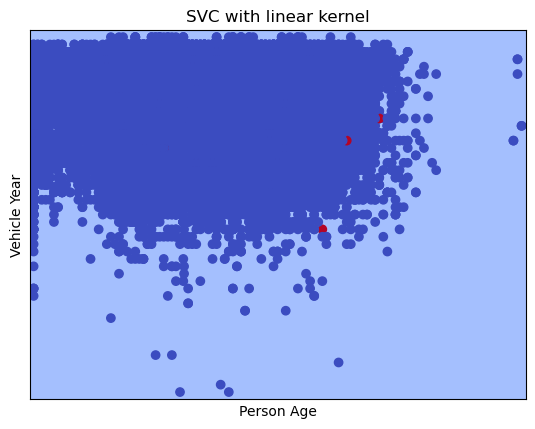

SVM Classifier Training Error: 0.0007513512203398046
SVM Classifier Validation Error: 0.9992486493632396
Linear-Kernel SVM Predicted Class: [0]


In [96]:
out = SVM_train_predict(['PERSON_AGE','VEHICLE_YEAR'],[40,2015],'linear')
print('SVM Classifier Training Error:', out[0])
print('SVM Classifier Validation Error:', out[1])
print('Linear-Kernel SVM Predicted Class:', out[2])

##### SVM Classifier with a Polynomial Kernel (testing a subset of features)

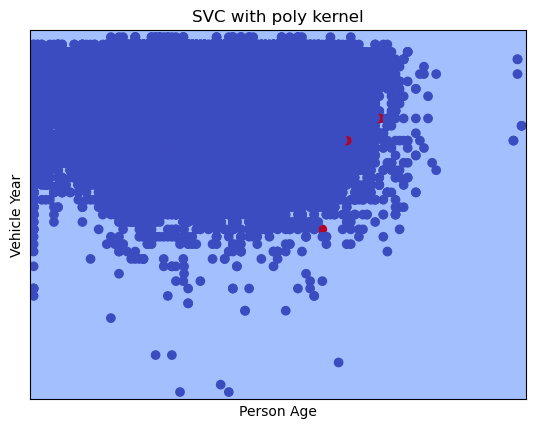

SVM Classifier Training Error: 0.0007513512203398046
SVM Classifier Validation Error: 0.9992486493632396
Polynomial-Kernel SVM Predicted Class: [0]


In [97]:
out = SVM_train_predict(['PERSON_AGE','VEHICLE_YEAR'],[40,2015],'poly')
print('SVM Classifier Training Error:', out[0])
print('SVM Classifier Validation Error:', out[1])
print('Polynomial-Kernel SVM Predicted Class:', out[2])

##### SVM Classifier with a Radial Basis Function Kernel (testing a subset of features)

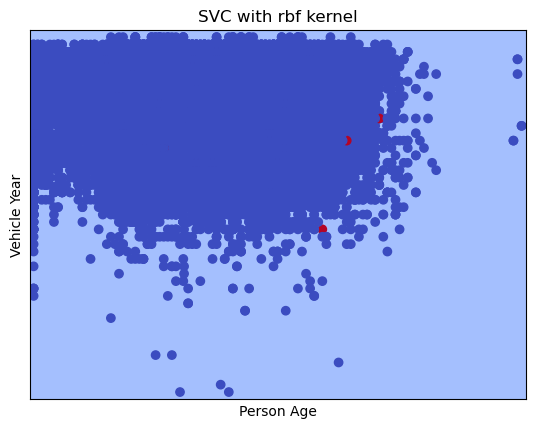

SVM Classifier Training Error: 0.0007513512203398046
SVM Classifier Validation Error: 0.9992486493632396
RBF-Kernel SVM Predicted Class: [0]


In [98]:
out = SVM_train_predict(['PERSON_AGE','VEHICLE_YEAR'],[40,2015],'rbf')
print('SVM Classifier Training Error:', out[0])
print('SVM Classifier Validation Error:', out[1])
print('RBF-Kernel SVM Predicted Class:', out[2])

As we can see by the outputs above, there is no difference in predictions across the three SVM models with changed kernel types. Additionally, the SVMs performed well on the training set, however, when given the validation set, they performed very poorly, achieving a high validation error rate.

#### Model #5: Random Forest (testing all features)

We will use a random forest, a form of an ensemble classifier &mdash; one that combines several weak hypotheses slightly better than random guessing into one with a low error. Specifically, a random forest consists of several decision trees combined, with the prediction of each decision tree contributing in some manner to the final classification. We will first test out a random forest with maximum depth of 2 and then test out a slightly higher value, 5. Note that we do not go beyond 5 since in that case, our model would be prone to overfitting.

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

##### Constructing the Model with Height = 2

In [100]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(crashDataNew[['DRIVER_LICENSE_STATUS_MAPPED','PERSON_AGE','VEHICLE_YEAR','SAFETY_EQUIPMENT']], crashDataNew['PERSONS_AFFECTED_CATEGORIZED'])
print('Random Forest Training Error:', compute_training_error(clf,crashDataNew[['DRIVER_LICENSE_STATUS_MAPPED','PERSON_AGE','VEHICLE_YEAR','SAFETY_EQUIPMENT']],crashDataNew['PERSONS_AFFECTED_CATEGORIZED']))
print('Random Forest Validation Error:', compute_validation_error(clf,crashDataNew[['DRIVER_LICENSE_STATUS_MAPPED','PERSON_AGE','VEHICLE_YEAR','SAFETY_EQUIPMENT']],crashDataNew['PERSONS_AFFECTED_CATEGORIZED']))
print('Prediction for a Driver License Status of those Unlicensed:', clf.predict([[0,40,2015,5]])[0])
print('Prediction for a Driver License Status of those with a Permit:', clf.predict([[1,40,2015,5]])[0])
print('Prediction for a Driver License Status of those Licensed:', clf.predict([[2,40,2015,5]])[0])

Random Forest Training Error: 0.0011875214828729053
Random Forest Validation Error: 0.9988124785210776
Prediction for a Driver License Status of those Unlicensed: 0
Prediction for a Driver License Status of those with a Permit: 0
Prediction for a Driver License Status of those Licensed: 0


##### Constructing the Model with Height = 5

In [101]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(crashDataNew[['DRIVER_LICENSE_STATUS_MAPPED','PERSON_AGE','VEHICLE_YEAR','SAFETY_EQUIPMENT']], crashDataNew['PERSONS_AFFECTED_CATEGORIZED'])
print('Random Forest Training Error:', compute_training_error(clf,crashDataNew[['DRIVER_LICENSE_STATUS_MAPPED','PERSON_AGE','VEHICLE_YEAR','SAFETY_EQUIPMENT']],crashDataNew['PERSONS_AFFECTED_CATEGORIZED']))
print('Random Forest Validation Error:', compute_validation_error(clf,crashDataNew[['DRIVER_LICENSE_STATUS_MAPPED','PERSON_AGE','VEHICLE_YEAR','SAFETY_EQUIPMENT']],crashDataNew['PERSONS_AFFECTED_CATEGORIZED']))
print('Prediction for a Driver License Status of those Unlicensed:', clf.predict([[0,40,2015,5]])[0])
print('Prediction for a Driver License Status of those with a Permit:', clf.predict([[1,40,2015,5]])[0])
print('Prediction for a Driver License Status of those Licensed:', clf.predict([[2,40,2015,5]])[0])

Random Forest Training Error: 0.0011875214828729053
Random Forest Validation Error: 0.9988124785210776
Prediction for a Driver License Status of those Unlicensed: 0
Prediction for a Driver License Status of those with a Permit: 0
Prediction for a Driver License Status of those Licensed: 0


##### Visualizing the Model with Height = 2

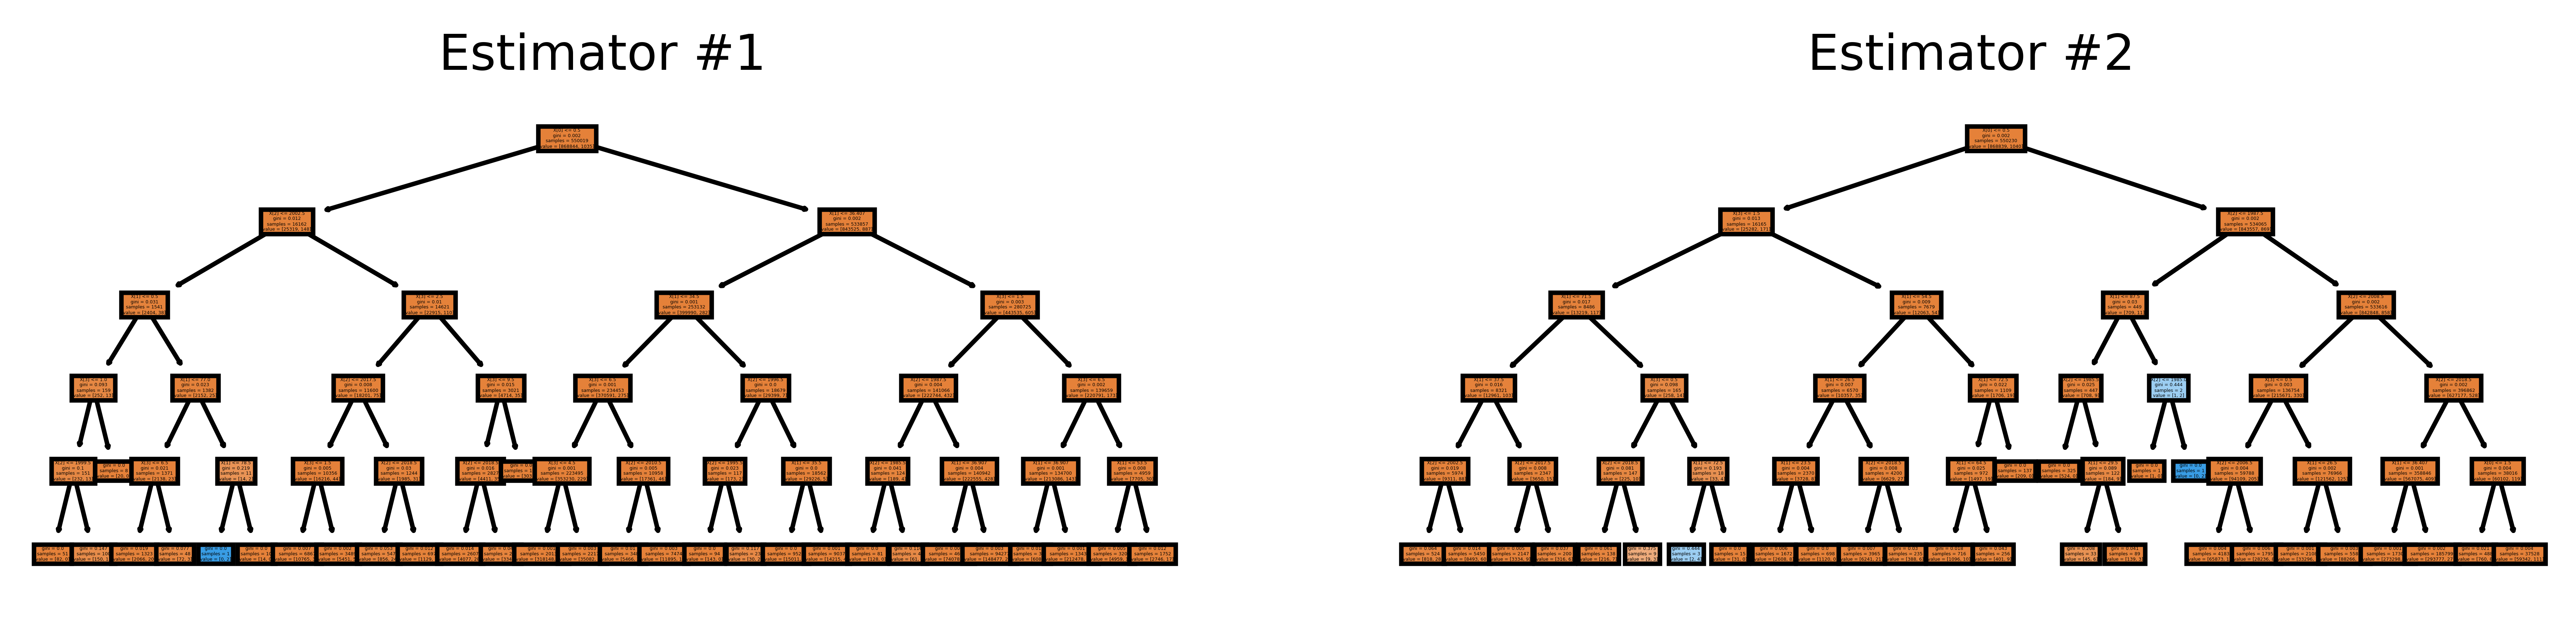

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,2), dpi=900)
for idx in range(0,2):
    tree.plot_tree(clf.estimators_[idx], filled=True, ax=axes[idx]);
    axes[idx].set_title('Estimator #' + str(idx+1), fontsize=11)

##### Visualizing the Model with Height = 5

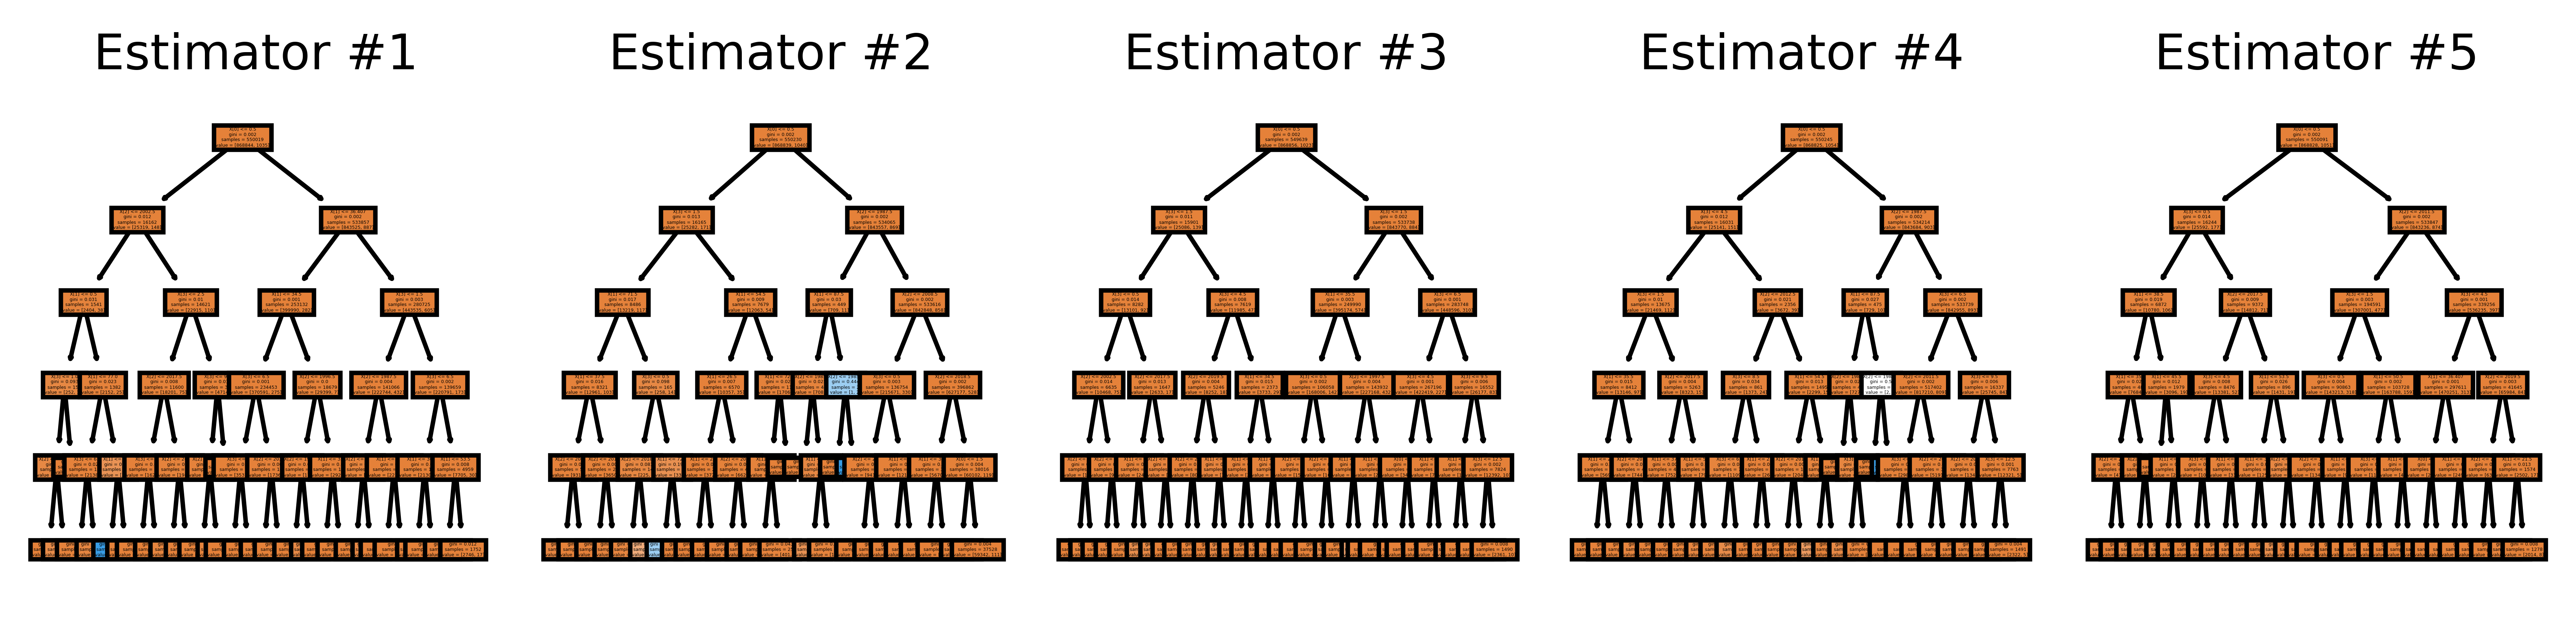

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,2), dpi=900)
for idx in range(0,5):
    tree.plot_tree(clf.estimators_[idx], filled=True, ax=axes[idx]);
    axes[idx].set_title('Estimator #' + str(idx+1), fontsize=11)

Similar to the SVM with kernel above, the random forest performed very well on the training set, but performed poorly on the validation set, proving that the random forest classifier with either height parameters is not a good classifier for the features analyzed. The random forest with a height of 2 made the same predictions as the random forest with a height of 5 for all three driver license status levels tested, as they all predicted a value of 0, which corresponds to the 'Low' crash severity level.

#### Statistical Test to Compare the Models Above (using a subset of features)

In [104]:
from scipy.stats import ranksums, mannwhitneyu

In [105]:
X = crashDataSubset[['PERSON_AGE','VEHICLE_YEAR']]
y = crashDataSubset['PERSONS_AFFECTED_CATEGORIZED']

##### Comparing the Decision Tree Classifier with the Linear SVM Classifier

In this section, we compare the decision tree classifier constructed above with the linear SVM classifier.

In [106]:
clfLinearSVM = svm.SVC(kernel='linear', C=0.01)
clfDTree = tree.DecisionTreeClassifier()
clfLinearSVM.fit(X,y)
clfDTree.fit(X,y)
predLinearSVM = clfLinearSVM.predict(X)
predDTree = clfDTree.predict(X)
t, p = ranksums(predLinearSVM, predDTree)
print('p-value: %.3f, t-Statistic: %.3f' % (p,t))
if p <= 0.05:
    print('Significance Test Conclusion: There is a significant difference between the two models')
else:
    print('Significance Test Conclusion: There is not a significant difference between the two models')

p-value: 0.995, t-Statistic: -0.006
Significance Test Conclusion: There is not a significant difference between the two models


##### Comparing the Random Forest Classifier with the Linear SVM Classifier

In this section, we compare the random forest with height=5 with the SVM with linear kernel classifier.

In [107]:
clfRandomForest = RandomForestClassifier(max_depth=5, random_state=0)
clfLinearSVM = svm.SVC(kernel='linear', C=0.01)
clfRandomForest.fit(X,y)
clfLinearSVM.fit(X,y)
predRandomForest = clfRandomForest.predict(X)
predLinearSVM = clfLinearSVM.predict(X)
t, p = ranksums(predRandomForest, predLinearSVM)
print('p-value: %.3f, t-Statistic: %.3f' % (p,t))
if p <= 0.05:
    print('Significance Test Conclusion: There is a significant difference between the two models')
else:
    print('Significance Test Conclusion: There is not a significant difference between the two models')

p-value: 1.000, t-Statistic: 0.000
Significance Test Conclusion: There is not a significant difference between the two models


# VIII. &nbsp; Post-Analysis Data Limitations and Conclusions

#### General Conclusions

From conducting our first analysis, we found that there were significant differences in crash statistics between the five boroughs of New York City. As we discussed in Section VII (Data Analysis), all of the variables we tested with the crash severity level, which was the research question we were trying to answer, had a weak pairwise correlation. The heatmaps that were generated and the numerical correlation values that were found were all evidence towards the conclusion that there a good predictor does not exist between the features in our data set and the crash severity level. However, even with that, we still tried fitting our data with a model, which we performed by three ways: (1) a linear classifier, (2) a decision tree, and (3) a random forest. From those, we could observe that the linear regression model achieved a very low regression score using the individuals' age and year the vehicle was made to analyze the crash severity level, and the decision tree achieved a very high training error when the person age and safety equipment were analyzed as fators, which was consistent with the extremely weak correlations found above. The random forest classification model resulted in predictions with low training error, but a very high test error. Below, we will analyze the key findings from the predictive analysis performed in Section VII, Part III of this report.

#### Effect of Driver License Status on Crash Severity Level

The driver license status proved to be a good predictor of the crash severity level on the training set, as it achieved a low training error, however, had a high generalization error, indicating that the driver license status by itself is not a good overall predictor of the crash severity level.

#### The Combined Effect of Person Age and Vehicle Year on Crash Severity Level

When both person age and vehicle year were predictor variables attempting to predict the crash severity level, the training error was very low but the generalization error was very high, indicating that the combined relationship of person age and vehicle year with crash severity is weak.

#### The Combined Effect of Person Age and Safety Equipment on Crash Severity Level

When both person age and the safety equipment of the vehicle were predictor variables attempting to predict the crash severity level, the training error turned out to be very high, with a very low generalization error.

#### Post-Analysis Data Limitations

The limitations I encountered while working with this dataset was that every variable had close-to-zero correlation with the crash severity level, and thus, predicting the crash severity level from those features would not constitute as a good model, and would have a high generalization error rate &mdash; the error rate on unseen instances. Another key limitation was that there were duplicates in the collision IDs (one for each vehicle or individual), which indicates that a single motor vehicle crash accident was counted more than once, making it more difficult to separate out the dataset with respect to the 'COLLISION_ID' feature. As described in Section VII (Data Analysis), I took care of this by adding a new dataset and used that dataset wherever the duplicate entries might be skewing the analysis.

# IV. &nbsp; Source Code

The following link contains the datasets used throughout this project: https://cornell.box.com/s/r7ujuab5mlouv0i9i1dpvejze6m0f6zg.

# V. &nbsp; Acknowledgements

1. Plotting Geopandas Maps: https://geopandas.org/docs/user_guide/geometric_manipulations.html
2. Visualizing Random Forests: https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
3. Example of Plotting SVMs with the Iris Dataset: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html 